In [ ]:
!pip install pandas spacy tensorflow imbalanced-learn

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
#import libraries
import pandas as pd
import spacy
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset_new/new/pre_pro1.csv')

In [ ]:
df

sentence  labels
0      rt dinerolocobo if nigga fuck bitch dat ha cat...       1
1                 rt dinofool ima catfish bitch fake arm       1
2      rt dinofool yall ever normal day mind play hor...       1
3      rt diponlin i close eye shit sometim bitch abl...       1
4      rt diponlin if k michel apart baltimor twitter...       1
...                                                  ...     ...
21078                          i think there water kadir       1
21079  even though bangladesh bangladesh jamaateislam...       1
21080                                   rais gelig salsa       1
21081                                 i want fuck lawyer       1
21082                         thi whore tarek night meal       1

[21083 rows x 2 columns]

In [ ]:
#check null values
df.isna().sum()

sentence    1
labels      0
dtype: int64

convert lowercase

In [ ]:
def safe_lower(val):
    if isinstance(val, str):
        return val.lower()
    return val

In [ ]:
df['sentence'].apply(safe_lower)

0        rt @dineroloco_bo: if a nigga fuck my bitch da...
1        rt @dino_fool: ima catfish a bitch with fake arms
2        rt @dino_fool: y'all ever just been having a n...
3        rt @diponline i be closing my eyes and shit so...
4        rt @diponline if k michelle was apart of balti...
                               ...                        
21078        i think there's no water down there in kadir.
21079    even though bangladesh's bangladesh jamaat-e-i...
21080                                raised by gelig salsa
21081                              i want to fuck lawyers.
21082              this whores you are tarek's night meal.
Name: sentence, Length: 21083, dtype: object

Remove HTML Tags

In [ ]:
import re
def remove_html_tags(text):
    if isinstance(text, str):
        pattern = re.compile('<.*?>')
        return pattern.sub(r'', text)
    return text

In [ ]:
df['sentence'] = df['sentence'].apply(remove_html_tags)

Remove URL

In [ ]:
def romove_url(text):
  pattern = re.compile(r'https?://\S+|www\.\S+')
  return pattern.sub(r'', text)

In [ ]:
df['sentence'].apply(romove_url)

0        RT @DineroLoco_Bo: If a nigga fuck my bitch da...
1        RT @Dino_FooL: Ima catfish a bitch with fake arms
2        RT @Dino_FooL: Y'all ever just been having a n...
3        RT @DipOnline I be closing my eyes and shit so...
4        RT @DipOnline If K Michelle was apart of Balti...
                               ...                        
21078        I think there's no water down there in Kadir.
21079    Even though Bangladesh's Bangladesh Jamaat-e-I...
21080                                Raised by gelig Salsa
21081                              I want to fuck lawyers.
21082              This whores you are Tarek's night meal.
Name: sentence, Length: 21083, dtype: object

Social Media Chatwords

In [ ]:
chat_words={
'afaik': 'as far as i know',
'afk': 'away from keyboard',
'asap': 'as soon as possible',
'atk': 'at the keyboard',
'atm': 'at the moment',
'a3': 'anytime anywhere anyplace',
'bak': 'back at keyboard',
'bbl': 'be back later',
'bbs': 'be back soon',
'bfn': 'bye for now',
'b4n': 'bye for now',
'brb': 'be right back',
'brt': 'be right there',
'btw': 'by the way',
'b4': 'before',
'cu': 'see you',
'cul8r': 'see you later',
'cya': 'see you',
'faq': 'frequently asked questions',
'fc': 'fingers crossed',
'fwiw': 'for what it is worth',
'fyi': 'for your information',
'gal': 'get a life',
'gg': 'good game',
'gn': 'good night',
'gmta': 'great minds think alike',
'gr8': 'great!',
'g9': 'genius',
'ic': 'i see',
'icq': 'i seek you also a chat program',
'ilu': 'i love you',
'imho': 'in my honest humble opinion',
'imo': 'in my opinion',
'iow': 'in other words',
'irl': 'in real life',
'kiss': 'keep it simple, stupid',
'ldr': 'long distance relationship',
'lmao': 'laugh my a.. off',
'lol': 'laughing out loud',
'ltns': 'long time no see',
'l8r': 'later',
'mte': 'my thoughts exactly',
'm8': 'mate',
'nrn': 'no reply necessary',
'oic': 'oh i see',
'pita': 'pain in the a..',
'prt': 'party',
'prw': 'parents are watching',
'qpsa': 'que pasa',
'rofl': 'rolling on the floor laughing',
'roflol': 'rolling on the floor laughing out loud',
'rotflmao': 'rolling on the floor laughing my a.. off',
'sk8': 'skate',
'stats': 'your sex and age',
'asl': 'age, sex, location',
'thx': 'thank you',
'ttfn': 'ta-ta for now!',
'ttyl': 'talk to you later',
'u': 'you',
'u2': 'you too',
'u4e': 'yours for ever',
'wb': 'welcome back',
'wtf': 'what the fuck',
'wtg': 'way to go!',
'wuf': 'where are you from?',
'w8': 'wait',
'7k': 'sick:-d laugher',
'tfw': 'that feeling when. tfw internet slang often goes in a caption to an image.',
'mfw': 'my face when',
'mrw': 'my reaction when',
'ifyp': 'i feel your pain',
'lol': 'laughing out loud',
'tntl': 'trying not to laugh',
'jk': 'just kidding',
'idc': 'i don’t care',
'ily': 'i love you',
'imu': 'i miss you',
'adih': 'another day in hell',
'idc': 'i don’t care',
'zzz': 'sleeping, bored, tired',
'wywh': 'wish you were here',
'time': 'tears in my eyes',
'bae': 'before anyone else',
'fimh': 'forever in my heart',
'bsaaw': 'big smile and a wink',
'bwl': 'bursting with laughter',
'lmao': 'laughing my ass off',
'bff': 'best friends forever',
'csl': 'can not stop laughing',
}

In [ ]:
def chat_conversion(text):
  new_text = []
  for w in text.split():
    if w.upper() in chat_words:
      new_text.append(chat_words[w.upper()])
    elif w.lower() in chat_words:
       new_text.append(chat_words[w.lower()])
    else:
      new_text.append(w)
  return " ".join(new_text)

In [ ]:
df['sentence'] = df['sentence'].apply(chat_conversion)

Emoji Handling

In [ ]:
pip install emoji --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 15.7 MB/s eta 0:00:00


In [ ]:
import emoji
print(emoji.demojize('python is 😀'))


python is :grinning_face:


In [ ]:
for i in range(11005):
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
  print(emoji.demojize(df['sentence'][i]))

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @DineroLoco_Bo: If a nigga fuck my bitch dats on ha cat .. but ima leave yu alone fa being trifling
RT @Dino_FooL: Ima catfish a bitch with fake arms
RT @Dino_FooL: Y'all ever just been having a normal day and your mind plays a horrible trick on you and give you a whiff of some good pussy&#8230;
RT @DipOnline I be closing my eyes and shit sometimes so bitches be able to sneak a quick nipple lick in.. But she ain't going ham on me yo
RT @DipOnline If K Michelle was apart of Baltimore twitter she'd be one of them hoes saying she's celibate smh
RT @Dipset_Kenn: RT @ToneThaMan55: RT @PAPER_CHAYSIN: I love money fuc a bitch I won't stress myself , and I keep my mouth closed cuz I can&#8230;
RT @Dirrttyydan: Chi ain't no bitch then you got them Assyrian kings on California and Peterson &#128081;&#128081;
RT @DirtyEaffiliate: you can't turn a hoe into a housewife hashtag tupac
RT @DivaMonRoe2uHoE: Fuck candy. Eat pussy. &#128527;
RT @DivaMonRoe2uHoE: Niggas always wanna talk about how God 

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @EchelonInsights: Rick Scott beating win number in 30 counties, Charlie Crist in 13. #FLGOV
RT @EinsteinParody: Waterproof lab coat in case I drown in the pussy #swag
RT @EisenbackEmily: I hate when people leave their trash in my car.
RT @ElJefeDeJefes4C: "@Virgilio_LLA: Jammin these sad songs, smoking squares thinking bout bitches..." lmfao
RT @El_Grillo1: In the ME, the crow would eat the bear MT @webradius Obviously not in the ME MT @solemnwatch: Bear Saves Drowning Crow - An&#8230;
RT @ElderLWM: And Black women need to stop referring to themselves and other sisters as "hoes" &amp; "Bitches"..... It really ain't a good look&#8230;
RT @EliRipRashad: I love them stripper bitches
RT @Elisaa_Martinez: Happy birthday cotton picker laughing out loud @1NOnlyDirtyMike
RT @Elisha40hands: bitch you got too many teeth in your mouth
RT @ElleHueyXIV: "Fuck me or I'll make you feel bad about it. But if you fuck other guys, I'll call you a hoe. And if you fuck me, I'll thi&#8230;
RT @Em_99car: 

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @FunnyPicsDepot: this bitch at the mall shaped like mr. incredible http://t.co/L8CuVNznWm
RT @FunnyPicsDepot: this the "I play soccer, cheat on girls, and wear khaki coloured cargos" haircut http://t.co/rJVOVoO53l
RT @FunnyQuotees: Halloween use to be a holiday for kids. It is now National dress like your inner hoe day.
RT @FunnyQuotees: I hope a bird shits on your face, bitch.
RT @FunnySayings: &#8220;you&#8217;re a bitch&#8221; that&#8217;s new information thanks
RT @Fvnxy: Irrelevant people talk so much shit like who the fuck are you bitch
RT @Fvnxy: When before anyone else turns out to be a hoe http://t.co/h37nSQCmaR
RT @G0ldenG0ddess: Turn up about to be real , marriott with my bitches for the weekend , mansion tonight , adult swim tomorrow &#128131;
RT @GBithc: This bitch think she cute and have all the guys over her hunny ur fake asf just like ur weave he dont even like you stfu
RT @GDKElijah: Ladies, if your pussy sounds like this please hit my DMs. I need you for a science 

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @GreatNegrodamus: Lmfaoooooooooo trash ass falcants RT @PacDaGoat: LMFAOOOOOOOOOOO ya stink @BlakeDaBasedSon
RT @GreatScottnyc: All bitches is crazy.
RT @Great_Bryt: Riff Raff is trash
RT @GreaterThn: When you see before anyone else retweet or mention some hoe http://t.co/864iI0yIoV
RT @GreenLanternJet: I was already 24 when Jeter arrived so I had plenty of #Yankees memories, but next year is going to be very odd indeed.
RT @Gresham_Major: you tell us you fuckin barbarian RT @TypoGawd: Does pussy juice really help ya beard grow?
RT @Griff_TheGreat: Drake said it best when he said "Niggas act more like bitches these days!"
RT @GrownAssMidget: I&#8217;m a bitch? You&#8217;re a bitch. Your mom&#8217;s a bitch for having a bitch, your dad&#8217;s a bitch for fucking a bitch. Now who&#8217;s t&#8230;
RT @GrvndBxrry: i hate when bitches brag bout how they bf put it down ........ Then they single .... &#128514;
RT @GuapoAficionado: Kill em all at once I say. RT &#8220;@PacDaGoat: The world

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @HerMoufPiece: Love a bitch that never act hollywood
RT @Herman_NYRBlog: Yankees shouldn't even bother to show up to Boston, man. Just fold the franchise. Cancel baseball.
RT @Hermit_Thrush: I suck a giant dick, i suck a skinny dick &#9835; i suck a faggot dick, i suck a nigger dick &#9835; i suck the dicks that remind me&#8230;
RT @HeroineAddict: 15 y/o me totally understood 'Twin Peaks'. 40 y/o me can't seem to follow these 'The Great Outdoors' Goldfish crackers &#8230;
RT @HeyZeus666: I think most men cheat because they're addicted to that new pussy smell.
RT @HiDevon_: The nae nae got to the white ppl it's too late &#128553; &#8220;@ayoTeeshh: laughing my ass off they ate this hoe stonnaaaaa &#128535;&#128168;&#127809;&#127811;&#127810; #NaeNae https://t.co/pn&#8230;
RT @HiImAnAsshole: &#8220;@Victoria_Finae: Chief keef is trash.&#8221;I'm glad someone said it
RT @HiImAnAsshole: @dustine82394 @Victoria_Finae @Jammer9Hunna @scary_jumanji8 low key miss you bitches&#128517;
RT @Hi_

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @HoodJesusYo: Last name, Sinner First name, Imma Like ur pancakes in tha mornin, He got you covered like Aunt Jemima
RT @Hoodrichnick: Why ya niggas be gassin these wack ass bitches ? &#128553;&#128553;
RT @HoodsButtCrack: @vegebitemeash 10 brownie points for you
RT @Hoodstarz_Dread: Main reason why i aint got no girl cause i aint never found not 1 bitch who tryna get money wit me all y'all hoes like&#8230;
RT @HootieGang4Ever: Des bitches swear dey faithful
RT @HornyFacts: A girl KNOWS when a bitch likes her boyfriend &#128564;&#128080;
RT @HornyFacts: Fuck twerking, bitch can you cook?
RT @HornyFacts: I call my penis The Titanic because so many bitches went down on it.
RT @HornyFacts: Your opinion is irrelevant because you are a cunt.
RT @HornyFacts: a girl tweeted "you might be ghetto if you bring food from outside into the movies" no you might be stupid if you pay 4.99 for a&#8230;
RT @HoskinsTy96: &#8220;@xjessica14x: Brandon is so annoying&#8221;and a lil bitch
RT @HoskinsTy96

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @ImNeverChillin: You get drunk with a bitch and you try and grab her ass she get all offended, Well excuse me bitch I thought you were a hoe
RT @ImNeverChillin: bitches cant finish a 6 inch sub but want a 13 inch dick
RT @ImNeverChillin: i text my ex while she was with her bf so they can fight I was like "you looked cute today" &amp; I aint seen the bitch in &#8230;
RT @ImNeverChillin: pregnant bitches get on the bus and think you suppose to give them your seat like bitch you should of fucked a nigga wi&#8230;
RT @ImNotTwitFamous: Big Sean is 5'7 and 159 pounds, yet he calls everyone lil' bitch. You the lil' bitch Sean, you the lil' bitch
RT @ImNotTwitFamous: Bob Marley wrote about peace but all you hoes remember him for is smoking a blunt
RT @ImNotTwitFamous: How to deal with cyber bulling: 1:log out 2:go outside 3:that's it,stop being a pussy
RT @ImNotaPlayerTho: Still trying to hit this hoe...... &#128133;&#128133;&#128133;&#128133; http://t.co/jbHjMpY1gX
RT @ImSledgren: Looking 

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


RT @JStac825: There's coon classic (R. Kelly, Usher) and then there's classic (Stevie Wonder, Prince). Not that there's anything wrong with&#8230;
RT @JZolly23: Kickin trash cans on the golf cart #yeeyee @weidie1211 @mowder03 @JBilinovich @cmnw86
RT @J_Kwest: @HarveyWordman b in da pussy 2 mins like http://t.co/dnrCMkg5oo
RT @J_Kwest: @HarveyWordman is lupe fiascos retarded illegitimate son
RT @J_Kwest: I dnt trust bitches who think they shud b on Bad Girls Club
RT @J_Kwest: Ima buy dat bitch a jump rope bitches live jumpin 2 conclusions
RT @J_Leche14: A relationship does not stop a hoe from being a hoe.
RT @JaazieL_: Bitches will tell you, it's all about the angles &#128129; RT &#8220;@40oz_VAN: Watching my bitch take 25 selfies just to get that right 1.&#8221;
RT @JackBPR: Alec Baldwin mocks Harris-Perry: &#8216;If I cry, will I be forgiven all my transgressions?&#8217; http://t.co/9Oq5GTPmXx via @BizPacRevi&#8230;
RT @JacksonBynum: You're an annoying cunt
RT @JaclynDeeter: Well may

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


RT @Jaydillz: My babies pussy is too tight today. http://t.co/if4K4v74RO
RT @Jaydillz: RT if you a hoe
RT @Jaykelz: @LeBronVuitton @1stName_Bravo they renamed that bitch the yacht club
RT @JayonnaZarate: She my Lowkey bitch, the one I ride Lowkey with.
RT @Jaystuh72: &#8220;@187XO_: ' Not playen that side niggah shit with mine .&#8221;omm
RT @JayyMfCarter: If you gotta nigga or bitch.... PLEASE STAY OUT MY DM's I'm tired of y'all taken girls
RT @Jayy_Gee96: Dumb bitches
RT @JazmineJanay: My hoe phase is over
RT @Jazsmin__: You always ugly to a bitch that don't like you&#128564;
RT @JazzRiley: Can't put my trust in NO bitch
RT @JazzRiley: Can't trust none of these hoes
RT @JazzRiley: If a hoe give my lil Sista a eye like that she betta call me so we can go jump the bitch &#128514;&#128514;&#128514;&#128514;&#128514;
RT @JazzRiley: Wat type of bitch ass nigga rape a innocent female
RT @JazzyClarks: If you hate me I dont care. New flash bitch, I dont live to please you aha
RT @Jazzy_Blow

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @JoeBudden: If you can&#8217;t deal w what we go thru&#8230;. Then I got bitches lined up, I got an ego too.
RT @JoeBudden: It&#8217;s so unfair that the hoes get to dress up as hoes for Halloween.
RT @JoeBudden: My definition of "bad bitch" has changed drastically over the years.
RT @JoeBudden: Nigga can&#8217;t even feel up on a bitch in a pic without the girl you fuckin getting mad, smh
RT @JoeBudden: Ok, I gotta cut this Carl Thomas album off before I call my ex &amp; say fuck you you ruthless bitch. laughing out loud
RT @JoeBudden: Or the &#8220;I was sleep&#8221; curve.. Really bitch ? you slept from 1am to 11pm huh.. Smh
RT @JoeBudden: She&#8217;s not a hoe cuz she had sex before bro, laughing out loud
RT @JoeBudden: She&#8217;s not a hoe cuz she&#8217;s not attainable to you bro.
RT @JoeBudden: So the woman I deal with is trying her best to make "entertaining" a bad word... "U be entertaining these bitches" laughing out loud
RT @JoeBudden: The dating scene so wack out here d

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


RT @JustHad_that: Good pussy &#128166;&#128049; comes with a smart ass mouth &#128068;&#128069; &amp; a crazy ass attitude &#128530;&#128175;
RT @JustKarahn: &#8220;@what_iDO: Karahn jus called her future baby a lil shit&#128565;&#128565;&#128565;&#128514;&#128514;&#128514;&#128514;&#128514;&#8221; bitch tell the world why don't you &#128530;
RT @JustLeShay: &#8220;@TheKaosYatti: @JustLeShay Who said you was cute&#128035;&#8221; byeeee mad bitch! &#128530; come visit me
RT @JustOneAsian: To every bug i have ever killed: i am sorry :/ &#8230;..sorry that ur bitch asses came into my house uninvited
RT @JustReIatabIe: when you die on flappy bird &#128514; http://t.co/Pu7uqxJFMc
RT @Just_this_time: If you think I've been an opinionated bitch lately just be glad I've stayed quiet on 3 of the topics swirling around he&#8230;
RT @Justcallme_duh: karmas a bitch my nigga
RT @JustinSwift7oh2: All these hoes just want some attention.
RT @JuuMane: I walks in Country Kitchen Restaurant to order ta

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @KarmenKarma: @KimKxxx @Tristan_Berri @YouknowRilynn @AmandaTateXXX about to go out with all these hot bitches! #happybirthdaytome http&#8230;
RT @Kash_Stackz: Him: your nudes are safe with me. Her: *sends nudes* Him: *calls homie* aye, why this hoe send me this trash ass nude, yu &#8230;
RT @KatelynBarnes3: Working out with the hoes @savanaharanda @AnnaComan2
RT @KathrynBruscoBk: Think #windturbines are bad for birds? Compare: http://t.co/FpOSfLdOXW via @BloombergNews http://t.co/Eh6I7dOjUz via &#8230;
RT @KatiePavlich: Charlie Crist doesn't have any more political parties to join, but he could become a spokesman for a fan company.
RT @KatiePavlich: Now go take out the trash &#8220;@sdoocy: . Today I was #outnumbered, but thankfully not #dismembered! Thanks, Ladies http://t.&#8230;
RT @KattPacWilliams: Niggas wearing TOMS &amp; UGGS , &amp; bitches wearing JAYS &amp; TIMBS. Lol, this aint what Usher meant when he said "Trading Pla&#8230;
RT @KattWilliams: A MILF is a sexy ass mom o

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @KingMiller_: The top comeback for when you call a nigga ugly. 1. "I still pull more hoes than you."
RT @KingRyin: RIP Robin Williams, I'm gonna fuck the baddest bitch tonight for you bruh
RT @KingShelton_: Hell nah bitch http://t.co/owR6BjoZz4
RT @KingTeej_: Thats when you say "this bitch aint got no job" #mlrt
RT @KingUlyssesIV: These bitches aint shit &amp; pussy is my greatest vice I love smokin weed, i hate advice
RT @King_Gerry_R: Remember all the trash on the floor of your car? We upgraded it &amp; put Wale's The Gifted so it feels like your old car htt&#8230;
RT @King_Lonnie_19: "@TaeCocky: Rihanna is a talented hoe" http://t.co/uL4ePHA2qy
RT @King_Shawn_6: &#8220;@white_thunduh: Dez is caked up with some bitch or something cause hes not playing like Dez Bryant&#8221;&#128514;&#128514;&#128514;&#128557;&#128557; God dammit Patr&#8230;
RT @King____J: One nigga from the past told me one thing I'd never forget "one mans trash is another mans treasure"
RT @Kings_Groove: &#8220;@

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @LaVidaJeannette: I hate when a bitch says she dont care if her nigga broke and he got nothing going for himself.. acting like a fake Ri&#8230;
RT @LaVintageTribe: Getting all these checks like Nike I'm icy and yo bitch like me- dice soho &#127922;
RT @LadiesLuv_Audi: Eating pussy is good....eating everybody pussy ain't healthy
RT @LadyMercia: Mother of Manchester 'terror twins' who went to Syria to become Jihadi brides snatched by ISIS ... http://t.co/trhNMdVnCM v&#8230;
RT @Lady_BlahBlah: furrybah *in my PayPay voice* RT @80sbaby4life: The hoes are for EVERYBODY my nigga!
RT @Lady_Trucker: To Fez: Your nipples couldn't be covered by two trash can lids. @RonnieBquotes
RT @LakeShOwQueen: Kevin Love out here bein a hoe... Just let the world know you gonna be a Laker 2015 season dawg
RT @LakersTV: VIDEO: @kobebryant on talking trash while facing @NickSwagyPYoung during today&#8217;s scrimmage &#8211; http://t.co/3njZFytc1R http://t.&#8230;
RT @LalaCoutureeXO: "if your gf/bf don't like

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


RT @LethalBizzle: Suck yo momma flappy bird!!!!!!
RT @LettyBro_: Yall hoes super weakkkkkkkk
RT @LevisNInk: &#8220;@iDocLyfe: When you ain't had pussy in a hot minute... http://t.co/uidvqXugE2&#8221; OMM &#128514;
RT @LexaTaughtYou: @hedge_brandon calm down bitch. Touch my boobs &amp; ill it your dick off &amp; staple it to your forehead, since you wanna be a&#8230;
RT @Lexieeller: My timeline right now Ravens &#127944; Ravens &#127944; Ravens &#127944; Commercial tweet &#128514; Ravens &#127944; Ravens &#127944; Ravens &#127944; &amp; Some bitch talkin ...
RT @Lexxinnn: Don't no nigga want no broke ass bitch &#8252;&#65039; but it's crazy how a bitch will do all she can to better a broke ass nigga &#128056;&#9749;&#65039;
RT @LiFEOf_AYUNgIN: That pussy is never yours it's just your turn remember that . &#128175;
RT @LiIuglymane: When your side bitch tries to hug you in public http://t.co/T5uRIsXNdF
RT @LiViBADD88: niggas talk more than bitches these days... let that sink in!
RT @Liam

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @Lipe_the_Great: Is everyone on the redskins lathered in oil? What the fuck?
RT @Lipe_the_Great: That fucking San Francisco game man. Wish that trash ass garbage team never "won." I pray that they meet in the fucking&#8230;
RT @LipstickYoda: Call my son "nigger": even respectable white ppl will be uncomfortable w/ you. Call him "thug":you probably can get off w&#8230;
RT @Lipstickjovie_: &#8220;@BeyonceHair: That bitch cut me off.&#8221; Lmfaooooooooooo
RT @LissetElisa: Juan likes black girls monday - wednesday, spanish girls thursday &amp; friday, &amp; white bitches on the weekend tbb
RT @LittleKeee_: why do bitches hate on another bitch relationship &#128129;
RT @LittleMissAriee: after bitches get da dick they be dickmatized!
RT @LittleSavage_: oml i never questioned my nigga ab another bitch &amp; if the nigga ever said some shit like that! that nigga lied.
RT @LiveAndUncut: Good pussy takes your mind off the struggles and stresses of everyday life
RT @LiveAndUncut: It's a lot e

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @Luccixo: When a bitch start looking at before anyone else &#128530;&#128514; http://t.co/o0AGdd9fQh
RT @LucentVariable: @TonyJRodriguez friendly reminder that you shouldn't try to have sex with birds
RT @LuchieCapone: &#8220;Kik me&#8221; ass hoes RT @mayasvritaa: Got an iPhone but it&#8217;s off ass bitches
RT @LuckyLanceJ: A bird doesn't sing because it has an answer, it sings because it has a song.~ @DrMayaAngelou
RT @LuckyLanceJ: Life's a bitch. You've got to go out and kick ass. @DrMayaAngelou
RT @LucyyLuux: &amp; when a nigga don't care if you leave it's cause he gotta another bitch he was tired of creeping w/ anyway !
RT @Luh_Myra: can't no bitch tell me a nigga NOT mines until she ready to tell me how tf he hers . &#128564;&#128075; it's levels to this shit ! &#128540;
RT @LuieSanches: PROUDLY a racist. you dumb nigger
RT @LuisEnriquez94: You don't love her if you keep a couple other hoes on the side
RT @Luisaco_: @Tonymartinezz15 dude last day, fuck it walk out that bitch


<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @MadFlyentist: Look at all those fake ass fuck boy ass desperate for a ring ass trash ass fake ass fans out there
RT @MadPatsFan1954: .@FR_INC "coon meat?!" Made me ill to even type that. Racist much? @lybr3
RT @MadameCrystalB: Tori better watch-out from her hoes..she's gonna get caught up &#128064;&#128064;&#128064;
RT @MaddieKreyKrey: I have to pretend like I'm a cold hearted bitch and cut you off in an instant without a second thought, when actually I&#8230;
RT @MadeaDonPlay: Call da po po hoe.
RT @Magssca: &#8220;@uce_INA: @Magssca you aint gon take a pic tho&#8221; &#128133; not scared to I'm in a Japanese steakhouse tho bitch was walking quick
RT @MahoganyLOX: vintage mickey &#127800; http://t.co/03otPzXCbI
RT @MahoghanyXO: The world wouldn&#8217;t be as fun if hoes didn&#8217;t exist.
RT @MainetheCK: I sell dope. I fuck hoes and make songs bout the shit. I rob niggas for they work and dont feel wrong bout the shit.
RT @MajorNews911: NBC News projects Charlie Baker (R) wins Ma

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @McNarstle: ...and rounding out our CNN Ebola panel tonight, the monkey from the 1995 film, OUTBREAK.
RT @McNarstle: @CzickenShack I go on Drudge Report every day now hoping to see a story about your tranny army
RT @McNarstle: And she's watchin' him with those eyes / And she's makin' him linguine &amp; clams with that body, I just know it!
RT @McNarstle: Yes, the bird tweets in the morning are lovely but remember, what you're hearing is: BIRD COCK HERE! GET SOME ROCK HARD BIRD&#8230;
RT @Mdizzle9000: this dumb bitch said....RT @MsVaVaVoom No matter what a man says the only way he'll truly respect you is if you hold out sex
RT @Medz4u: &#8226;not all black girls are ghetto though
RT @MeechIsDEAD: I Cant Wait Till you &amp; Ya Boyfriend Break Up, That nigga act Like he own the pussy
RT @Meechgod: &#8220;@1017_Sqquad: But it's some bad bitches on backpage ... You might find one of yo followers on there too &#128064;&#128064; &#128056;&#9749;&#65039;#WhereTheyAtDo&#8230;
RT @Meet_Nallah

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


RT @Mikey_Hands: Yankees offseason plan: Sign Sandoval, move A-Rod to first base, shoot Teixeira and throw his corpse in the East River. #Y&#8230;
RT @MilesM_05: How ghetto girls start their fights &#128514; https://t.co/WyKh16PLek
RT @Milesss_: If you say #blessed you r hashtag lying and r probably unhappy w/ ur life fake bitches lolz&#128514;
RT @Milesss_: like if you're a bitch, own it and be a bitch. But just cuz you got some flower emojis in some tweets doesn't mean you're som&#8230;
RT @MileyCyrus: i know what color my skin is. you can stop with the friendly reminders bitch.
RT @MillerThaGod: When Kendrick Lamar said "I call a bitch a bitch, a hoe a hoe, a woman a woman." I knew he was onto something. He was pre&#8230;
RT @MindCertified: If you're a hoe, don't expect princess treatment...
RT @MindOnSuccess_: My mother be on some trash man &#128514; I ask her EVERYDAY, you need/ want some money? She say "Naw I'm good!" But come payday&#8230;
RT @MiraGotTheJUICE: Woah did this bit

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @MontagKeys: Jeff Fisher saved by the refs. That was karma, but the zebras messed with it.
RT @Montrell_: Bitches be swearing they pussy soooo good &#128553;&#128530; nonsense &#128545;
RT @MooreHnter: How to get bitches http://t.co/yUOqmgHvbf
RT @MosoKnowso: RT @TroyAve I got no interest in tall skinny model bitches! I like my women with some ass &amp; hips ...
RT @MostDope6995: That shit could break you down if you lose a good girl I guess you need a bad bitch to come around and make it up
RT @MostSecretFacts: Twitter's home button is a birdhouse. When you join you're an egg. The logo is a bird. Most people don't realize this.
RT @MotherOfBraylon: &#8220;@1inkkofrosess: @MotherOfBraylon you already know they go to fed for me ah bitch be ready to walk out the door &#128514;&#128514;&#9996;&#65039;&#8221;&#128514;&#8230;
RT @Mr1738: "I didn't sell my pussy for $65.....it was $80!!!" http://t.co/sHPh98KzOY
RT @Mr1738: RT @ItsJustThai: All that weave turning you bitches into horses ht

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @MurderHigashi: I cannot be worried 'bout no bitch.
RT @MurderSHE_smoke: &#128514;&#128514;&#128514;&#128514; RT &#8220;@c4leigh: How ghetto girls pronounce there names... I could cry right now oh my god https://t.co/ZycuodIWKz&#8221;
RT @Murica_FuckYea: City bitches &#128514;&#128514;&#128514;&#128514;#starbucks #uggboots #Jellydoughnuts https://t.co/VVIT8HP40t
RT @MvckFadden: Treat good girls like a queen and treat hoes like garbage
RT @MyDadAtTheStore: If my son ever turn out gay ima have to get his mom and let this nigga know what a pussy feel like
RT @MyDickIsCalled: My dick is called Abusive Cat Owner because it always beats the pussy up.
RT @MyDickIsCalled: My dick is called Batman because bitches love it when my Dark Knight rises.
RT @MyDickIsCalled: My dick is called Cute Relationship because it's what all bitches really want.
RT @MyDickIsCalled: My dick is called Eggo because bitches never wanna leggo my Eggo.
RT @MyDickIsCalled: My dick is called Eggo because bitches neve

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @NoChillPaz: That bitch is dirty http://t.co/gWvAnyKzoo
RT @NoChillPaz: The only girls that care about being a guys WCW are hoes
RT @NoChillPaz: When a bitch says you're broke http://t.co/yFsL9rNK0j
RT @NoChillScottyD: Y'all fat bitches with small titties look like Teddy Grahams.
RT @NoContextAds: Tired of little bitches messing with your plants? Get your own Gangster Gladys http://t.co/LQbU0JG3br
RT @NoHoesNextDoor: "Tyrone I didn't mean to throw your mixtape in the trash c'mon fam" http://t.co/RWWVzJuUZK
RT @NoHoesNextDoor: If you claim Macklemore is your favorite rapper I'm also assuming you watch the WNBA on your free tears in my eyes faggot
RT @NoHoesNextDoor: Mimi so proud to be a hoe
RT @NoHoesNextDoor: When you make a beat with a pencil in class and the teacher says "keep making that trash ass beat and I'll fail you" ht&#8230;
RT @NoLovee_Lost: Bend ha over pull ha hair eat her pussy lick her ass
RT @NoMeek_JustMilz: I honestly hate women who bitch &amp; complain about a nig

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @O3_Millz: Wish I could get drunk tonight.. But my hoe ass drinkin buddy sick &#128530;&#128530;&#128586;&#128567; @1BookieG and the other one left &#128530;&#9992;&#65039;&#128640;&#128186; @xDSmooth
RT @O3_Millz: Yeah he a bitch &#128175;&#128175;&#128175;&#128548;&#128548;
RT @OGBEARD: And he still wont get no bitches RT "@willyroast2: Wow what the fuck http://t.co/h4NUr7ZzB8""
RT @OGBEARD: If I got $50 and my girl got $0 then I still got $50 cause that bitch should have a job.
RT @OGBEARD: Some of y'all bitches can't even grow this on yo damn head http://t.co/lYKqlHq0wT
RT @OGBitchh: god damn thats one manly bitch.
RT @OGMarcusC: !!!! &#8220;@RapAboutCereal: Jay Z verse trash. http://t.co/eYb3B08BTM&#8221;
RT @OGMarcusC: I hate stereotypes. Preconceived notions that black men are athletes or criminals.. Black women are ghetto and confined to t&#8230;
RT @OGSITTI: side hoe: hey, this is my boyfriend me: http://t.co/On9Hex5L4t
RT @OGTREEZ: laughing out loud niggas only act nice wh

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @OfficiallyIce: Nigga. The homemade tuna salad wit the saltine crackers tho?
RT @OfficiallyIce: RT @Manatti23: "I fucked your bitch cause she gave me a boner, she went down twice like Adrien Broner..." #FreckBars
RT @OfficiallyIce: you might be a faggot if you pull outta the pussy to bust bro.
RT @OfficiallyReid: Hoes be getting loose then move to other cities once everybody finds out they a hoe lol.
RT @Officialsed_: Most relationships end because bitches wanna take advice from their lonely ass single friends! &#128514;&#128514;&#128514;
RT @OgMonday: &#8220;@Satisfied_x: ESJ got some ugly hoes yeah, and them Leon G. Students ain't making no better. 99.9 of em fugly.&#8221;&#128128;&#128128;
RT @OhArias: I make the pussy cringe http://t.co/LNB2UXXQem
RT @OhEmmeG: RT if bitches are thirsty but you Hungarian
RT @OhEmmeG: just because you "not official" doesnt mean you can act like complete trash and be free from acting like a decent human being
RT @OhLawdItsNiesha: I swear that bitch

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @PaulIzzo2: @HomSec @LyndaG1963 Honey pot Harf is the state dept version of pussy Paltrow
RT @Pbn_Rico: Maury 65 years old and still exposing hoes.. &#128175;
RT @Pearls_N_Kisses: These hoes be acting up.. &amp; you know what, Imma let em..
RT @PedroBALLOUT: &#8220;@ApeezyBaby: New Year's Eve bitches be like ... #nye14 #drunkinlove #beyonce https://t.co/fsGa5WtKxn&#8221;
RT @PenguinGraham: Someone who claims they're a bad bitch shouldn't get offended so easily.
RT @Permatrippin: How i eat the pussy http://t.co/kdFHDx8yDT
RT @Persianboi10: #YesAllMen these hoes ain't loyal
RT @Perspective_pic: Retweet if you see the bird. http://t.co/o7reXL0teu
RT @Petahhdagod: bitch http://t.co/GLUuG7qz2p
RT @PeteRose_14: On this day 1941 the #Yankees Joe DiMaggio goes 0 for 3 with a walk vs Cleveland #Indians to end his 56 game hitting streak
RT @PeterpandaCat: @savanigga Sav is a fag
RT @Peteypab620: Eddy and teezy get no pussy so I don't know why they always talking about that shit. They've never

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @PrinceVelly: I feel sorry for da females that dont get what they deserve, while these hoe bitches get treated like queens &#128543;&#128543;&#128543;&#128543;&#128543;
RT @Princeeric11: #ReasonsIUnfollowedYou You unfollowed me first bitch
RT @Princessofwifi: "Stop being such a bitch" Me: http://t.co/RGg9IduVsi
RT @PrincexFbgm: Lonely twitter bitches be like #relationshipgoals &gt;&gt;&gt;&gt;&gt; http://t.co/9z9PxVnf89
RT @Prinncesskimm_: All my bitches attractive
RT @PriyaOhol: In Hopes of Recruiting More Women, ISIS Opens Jihadi Finishing School http://t.co/yKyFIJZgSI @aekulze @vocativ http://t.co/a&#8230;
RT @ProBirdRights: A marry between a man and woman people sloppery slop;then what is prevent a bird from marriage my sandwich??? I'm in lo&#8230;
RT @ProBirdRights: Advice tip for people: 1 stick hand in glue 2 stick hand in feather 3 now you are like bird. Impress your friend.
RT @ProBirdRights: dear Mr. Science: If human so "better," how come they can't be bird? oh I'm sorry 

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @RakwonOGOD: "You ugly anyway" "You a hoe anyway" - a nigga who just got curved but won't accept it
RT @RakwonOGOD: &#8220;Bros before hoes&#8221; - a bro with no hoes
RT @RakwonOGOD: Bitches tweeting "last night &gt;&gt;" like they did something special except be hoes
RT @RakwonOGOD: Lmaoo bitch what? http://t.co/2dhLgXcVg2
RT @RakwonOGOD: Rare pic of trash posing with trash http://t.co/usGIAZSDWv
RT @RakwonOGOD: you hoes going to church this morning like y'all wasn't busting it wide open for niggas about 4 hours ago
RT @RakwonOGOD: When ya side hoe tryna act up http://t.co/ayfGKVdEZI
RT @RakwonOGOD: i started fuckin with bitches who believe everything their horoscope say.they believe the dumbass horoscopes they gunna bel&#8230;
RT @Ramen_Odicho: Assyria got hella hoes
RT @Rameyhoe: 22. But we make it and this bitch sits on the couch and turns on Ice Age the movie and asks us if were hungry like we arent t&#8230;
RT @Rameyhoe: If you curve me im just going to assume your pussy is t

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @RhineRunIt: Henny &amp; hoes. RT @TiFFANY_P0RSCHE: Peace &amp; tranquillity &#8220;@daddykn0wsbest: If you were a Greek Mythical God&#8230;what would you be &#8230;
RT @Ribo333: @secupp your retarded
RT @RichBitxh_: Highwaisted jeans are not made for everyone bitches be looking horrible
RT @RichHomieMeezy: @54OO_Mauri my internet aint get transfered yet pussy
RT @RichgurlTira: These hoes will fake like they really f*ck with you but be hating on you lowkey
RT @RickNothing: I love how "twat" is gender neutral.
RT @RickRaze: Why would I be in a relationship theses hoes go still do them &#128514;&#128175;
RT @RickyNgan: These hoes is thotful
RT @RickyNgan: Y'all hoes ain't slick
RT @RickyScamp: The best way to avoid a tsunami of extramarital pussy is to wear sneakers on your daily commute. Also using the word sneake&#8230;
RT @RiddMcCoy: Where is everybody getting this "fuck her right in the pussy" sayin from?
RT @Ride907: If some little fucking faggot spits in my food I swear to god i

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @SLIZRD_WIZRD: 3 point on a bitch like Dirk Nowitzki, up in da club like Dirk Nowitzki.
RT @SLeyTMF: I aint nun to cut that bitch off
RT @SLeyTMF: Too many bitches not enough queens
RT @SLlMSHADY: Can someone show hailie this tweet? &#128514;&#128514; bitch blocked me &#128548;&#128514;&#128514;&#128514; https://t.co/VlpR7tMcAs
RT @SMACKHighAZ: "Seton Catholic where their own students talk trash about how low of a division there football team is in."
RT @SOMEXlCAN: Who needs Twinkies? When you got Gansitos?
RT @SSNAlerts: Rick Scott takes 49% of vote, Charlie Crist takes 46%. Scott wins second term: http://t.co/MmkyGCYVG1 #sayfie #FlaPol http:/&#8230;
RT @SSickStory: People need to stop being bitch made.
RT @SSparklesDaily: The most beautiful women I've met have bruised souls, tired eyes, &amp; quiet smiles. The survivors. The ones who know abo&#8230;
RT @STARgotthatDOPE: A lot of these hoes be cheating on they nigga fucking other niggas. Y'all boys better get y'all a real bitch tha

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @SegwaySurfer: hard 2 keep the hoes off me http://t.co/LemzSFqvEl
RT @Seinfeld2000: Uncle leo find iWatch in trash can http://t.co/T7GCSMCYLB
RT @Selenaelisandra: When a bitch says "hi" to before anyone else http://t.co/DF4vFUsQzJ
RT @SelfMadee_YG: @1stBlocJeremiah wya bitch
RT @SenorSteez This whole week was trash
RT @SenorSteez: Fuck wit us and then we tweakin hoe
RT @SenorSteez: I cannot fuck with a broke bitch! &#128175;
RT @SenorSteez: If you're a bad bitch why're you wearing sneakers?
RT @SenorSteez: Man, now these hoes know &#128514;&#128176;&#128182;&#128184; #TheJigIsUp http://t.co/8W9Ag3bx1a
RT @SenorSteez: These hoes ain't loyal mane, they rotate
RT @SenorSteez: This whole week was trash
RT @SenseiQuan: Hoes ain't shit RT @Now_Thats_Fresh: How superficial bitches are http://t.co/KIN2P59NjE
RT @SeoRedondo: If a bitch tries to get crazy tomorrow http://t.co/bY1j7hmQ3Z
RT @SethMacFarlane: And thus endeth our warm, fuzzy holiday lesson: Never take those you love for granted, 

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @SoccerGrlProbs: Germany's like....Next goal has to be a header. Then next goal after that has to be a diving header. Let's play monkey &#8230;
RT @SochittaSal: I got drugs and hugs for you, bitch.
RT @SochittaSal: Short bitches run sh!t.
RT @SolelyJones: Lowkey Apple made iOS 8 like this so niggas get caught and have to buy their bitches iphone 6s to make up
RT @SoloDahSystem: As in rubbing her booty on another mans penis. Sure RT @PacDaGoat: Fellas you cool with your girl dancing with other nig&#8230;
RT @Solyybee_: Lmfao RT&#8220;@macktology101: Alco(ho)l&#8221;
RT @Somaya_Reece: I am nice I am humble but I will still let a bitch know what's up! HUNNNNEY&#128133;&#128226;&#128226;&#128226;&#128226;&#128226;
RT @SomeoneBelow: The person below didn't get a big booty hoe.
RT @SomeoneBelow: The person below is a cunt.
RT @SomthinBoutSara: When I hear a baby cry at a restaurant I can literally feel my pussy slam a door closed and throw out the gone fishing&#8230;
RT @SooMonique: And s

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @StayyeGolden: &#8220;@vivalakristia: Everybody that's still on Facebook ghetto or pregnant idc.&#8221;accurate
RT @SteadmanTerri: @wheeler_kashhh Mann fuckk dat shit!!..fuckk dat bitch!! &#128514;&#128514;
RT @SteadmanTerri: @wheeler_kashhh bitch waaaaaa??
RT @SteadmanTerri: @wheeler_kashhh tf bitch!!??? laughing out loud
RT @StealUrGirlBush: Like honestly if you are embarrassed to be around someone because of how they look, you're trash
RT @Steamed_Greens: "@JuanNdaCut: This bitch wanna be Roger from American Dad so bad http://t.co/KXhA1ZtYMs"
RT @SteeloBrim: Captain Kirk hoe!
RT @SteeloBrim: Watch social media with all that hate in their blood try and wish bad on Derrick! He back bitch! Stop hating #Stronger #Qui&#8230;
RT @SteffyBallin: i hate when people ask &#8220;who you tryna look good for?!&#8221; bitch myself bye
RT @Steiny31: Peace, bitch. http://t.co/mEkV4wyJvq
RT @StephGhost: "You don't get bitches" RT @dondonboi: Take Care the mos overrated album that has been released

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


RT @StoppaOnline: so many groupie hoes in the condo its a group home - @KirkoBangz
RT @StormyDaniels: I know another chick I will NEVER shoot again. Filing this one under: heartless cunt
RT @StrangePintura: Why is there a pussy screaming on my TL ?
RT @StripesAllure: Bitches eyebrows be on FlEEK &#128064;&#128551; Loyalty on Weak &#128581; edges incomplete &#128134; and pussy on REEK &#128553;&#128567;&#127887; &#128514;
RT @Sttbs73: I see the crazy #teabaggers have given up on defunding Obamacare and have moved on to using veterans! #1MVetMarch
RT @Stuff4blackppl: Not basic bitches
RT @StuffKaySays_: I come off like a total bitch, but if I like you I will literally do anything for you.
RT @StunningStina: Come 2 Henderson, kilgore, Longview IT DONT EVEN MATTER. But you dumb ass hoes gone fuck around &amp;get your soul taken fro&#8230;
RT @StunningStina: We all know you're fucking a bitch right now laughing out loud
RT @SuckFuckIt: Stole your grandpas wardrobe bitch http://t.co/dtXqJTq

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @Svvage: "@will123_william: Isn't Ebola a type of soup???" Naw nigga its a country. My bitch is from there. She ebolian.
RT @SwaaggyyV: Fucking chinks in Clash of Clans always fuck me up. Bitch ass kamikaze faggots.
RT @Swagdollz_x: Back in the day when Drake was Aubrey/Jimmy and he made that song with his bitch girlfriend I said he was gonna be a rappe&#8230;
RT @SwaggVerified_: @TyJust_DoIt @Satisfied_x @Doit_LikeTre @_roeee but cant nobody at yall pep rally out jigg me
RT @SwallowMyChakra: Crying RT @WestSideFlee: How you gone wife a bitch that let niggas lick on her head in public?
RT @SwayHasAnswers: Twerking is ghetto until White people do it. Hip Hop culture is violent &amp; dangerous until they want to profit of it. ht&#8230;
RT @SwearingSport: Pirlo's one of them cunts who'd just be better at everything. He'd beat you at table tennis, shag your wife better &amp; win a&#8230;
RT @SweetHunnieLips: Lookie here folks I'm not a chocolate, thick, natural haired female Nudes=trash

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @TMRoja: I'm all cock and pussy like in my tweets; and all penis and vagina like in DMs &#128586;
RT @TMTWW_: @artillery909 @Ugh_Sickoe @LearnSomethlng how the bitch ear get burnt?
RT @TM__7: &#128514;&#128514;&#128514;&#128514;&#128514;&#128513;&#128513;&#128513;&#128513;&#128588;&#128588; RT @Lizzs_Lockeroom: Watching a bird poop on your car after you just got it washed http://t.co/k6AiIVU6Ph
RT @TOBINSUPREME: y does every female think every nigga they come across is in love w them? bitch I could leave you , smoke a blunt &amp; forget &#8230;
RT @TODDIE_soPLAYER: Ctfu &#128514;&#128514;&#8220;@1017_Sqquad: &#8220;@TODDIE_soPLAYER: @_Raygine bitch get out dem feelings and get some new dick&#128514;&#128514;&#128514; "&#128064;&#128550;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128128;&#8221;
RT @TOKYOJETZ: This nigga said "bitch told me she sent a nigga ta jail.... man I thought it was legal ta beat yo hoe...that's yo hoe!" Lmao&#823

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


RT @Teamadeezy: Niggas is hoes 2
RT @Tease: RT or you're a fag. http://t.co/4Ol82rdeqX
RT @TedNugent: Gun control talks with gunrunning Eric Holder on board. We r the planet of the apes
RT @TedOfficialPage: Your opinion is irrelevant because you are a cunt
RT @TedOfficialPage: guy: send me a pic of your pussy Girl: ok *sends pic of pussy*guy: HOLY SHIT, WHAT DAFUQ I WANTED TO SEE THE CAT!!!
RT @TeddyDelJones: Side hoes always winning
RT @Tee_Affiliated: I'm that type of bitch to tell you I'm on my way knowing I just got in the shower
RT @TeeeeRenee: bitches b tweeting everything they see to b Relavent &#128514;&#128514;&#128514; its really sad &#128563;
RT @TehDucKii: if my tweets ever offended you: 1.) im sorry 2.) it won't happen again 3.) 1 &amp; 2 are lies 4.) you're a fucking pussy
RT @TerrorFranchise: "I'm turning over a new leaf! No more drama and CoD for me!" Is still a faggot. #JustBigEThings
RT @TerryWigley_: @wagggggie iPhone 5 bitch
RT @TerryWigley_: Go fish bitch http://t

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


RT @TheCockiestMan: Do I have tears in my eyes for these hoes? http://t.co/OHKWCg9ldW
RT @TheComedyHumor: When I make a paper ball in the trash can http://t.co/mOxmRsOOv9
RT @TheCommonCock: Rt if you killed a bitch with your dick
RT @TheDiLLon1: Y'all not gonna trash Spirit airlines. I travel w/ them all the time. They even let me fly the plane 4 times. They don't mi&#8230;
RT @TheDickUno: I hate seeing people bitch about their lives. I haven't even tried the Taco Bell breakfast, man, you don't have it this har&#8230;
RT @TheDouch3: All the kickers in college football trash like y'all can't even make 20 yard field goals....u got one fucking job
RT @TheDouch3: Bitches tweeting "relationship goals" w/no man, job, or real desire to stop being a hoe or partying every weekend. Jus a iPh&#8230;
RT @TheDouch3: Most overused hoe excuses 1. It's just lyrics 2. My friends party so I party 3. Men do it too 4. And vice versa 5. I was yo&#8230;
RT @TheDouch3: Stay safe and remember if you a girl a

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @TheRealMFast: I wish a bitch would &#128544;&#128556;&#128548;&#128298;&#128299; http://t.co/jSnDXuyPdN
RT @TheRealMFast: Niggas cheat on the most loyal most beautiful women with fucking trash
RT @TheRealMugatu: @Deet02 @MikeNapoli25 @954Nole do I remember a game winning jack to right last summer at Yankee stadium that started a p&#8230;
RT @TheRealTenski: When I die take my casket to the club so bitches can twerk on it I'm putting the fun back in funeral
RT @TheReal_Salmon: Snail hoe: my parents just left, they gonna be gone for 15 mins.. Snail: ok ? Snail hoe: Im horny af Snail:... http:&#8230;
RT @TheRisingStar23: Shy Glizzy Decent Af
RT @TheRoachDean: "@SO_GALACTIC: "@Toodangerous_: &#8220;@SO_GALACTIC Gummy worms? https://t.co/TyXhQzqnqr&#8221;" ............" that bitch is a beast
RT @TheRoot: Don Lemon gets called an Uncle Tom, doesn't like it: http://t.co/eV4xgI5Pgc http://t.co/i6Xs8HCnrb
RT @TheSchwagQueen: Niggas be in your messages like &#128536;&#128141;&#128149;&#128166

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


RT @Thornton25: Bruh you're not a friend.. You fuck with me when you and ya bitch into it &#128514;&#128514;&#128514;
RT @Thotcho: See the jumbotron? That&#8217;s where the jig is
RT @ThotsLoveNike: Girlfriends hate them friendly bitches &#128514;
RT @ThottyGlo: How quick your bitch will text another nigga whens shes mad at you http://t.co/uRSI7AjUMP
RT @ThriIIuminati: I hate when people think I'm mad or sad cause I'm not talking.. nah I'm chillin bitch.
RT @ThriIIuminati: im chill as fuck but ill still turn up on ur bitch ass
RT @ThtNiggaXzavier: Couple A , B's , C's , bad bitch double D's , popping E's I don't give a F , told you I'm a G
RT @ThugLifeIsDead: best twitter beef all tears in my eyes was when @Vidal_Lucia called out Barbara hoe ass for cheating on her college bf with some pa&#8230;
RT @ThugginLegally_: Twitter jail is pointless your suppose to tweet , they need instagram jail for hoes doing Shout out for shout out all &#8230;
RT @TiaraSoBoojie: All the main bitches are g

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @TrillEsty: Retweet if you see a ratchet hoe on your timeline.
RT @TrillSteez_: &#8220;@sincerelylivy_: i can't fw no friendly bitch..&#8221;
RT @TrillZo_QMG: Girls with good pussy are possessed by demons its a fact
RT @TripleCz_3G: Finna make a power move wit a bitch taxes we both gone be straight long as she do wat I told ha
RT @TroyMadden: I guess it's cool to just walk around with ya titties out in a see-thru top? Shit.. if these hoes ain't trippin' how can I
RT @TroyMadden: If I see a bitch walking around wearing what Rihanna had on ima grab a titty and hoe I dare you to get mad, we can fight ab&#8230;
RT @TroyMadden: Real niggas can handle anything.. including any bitch or any nigga
RT @TrucksHorsesDog: Coincky~dink http://t.co/53bnMFYQZA
RT @TrueDreadhead: Girls wanna hoe around and turn up but gone regret the shit afterwards.
RT @TrueNovacane: @UFUCKIN_RIGHT hell nahh. If a bitch had respect for her own damn body, she wouldn't wear that shit in public.
RT @TrueNovacane: Back

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


RT @UberFacts: The strings attached to boxes of animal crackers were originally put there so that the box could be hung from Christmas tree&#8230;
RT @UceJayy: I see you subtweeting me hoe.
RT @UglyGawd: Or fags cause if you post you found him attractive as well RT @JactionJ: Niggas who post trannys to see if a nigga thirsts ov&#8230;
RT @UmChillBreaux: it's never about the hoes he's entertaining , it's always about the fact that he's entertaining these hoes !
RT @UmmmSassy: "You're such a bitch" http://t.co/3m1bRIlvfp
RT @UnCharted_: Don't get your panties in a twist. Just take 'them off and let my tongue twist around in your pussy instead.
RT @UnansweredQuot: Did that bitch ever get out of Ludacris's way?
RT @UnapologetiicB: If you've been though what I've been through you would have turned into a heartless bitch by now but I'm stronger &amp; bet&#8230;
RT @UnapologetiicB: What's it like being a cold hearted cunt?
RT @UnbearableTier_: I need my pussy ate now !
RT @UncleBlazer: Yo ma

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @WBeezy_: "@Run_DRC: Its simple, dont be a hoe=dont worry about being exposed &#128540;" fight me
RT @WBeezy_: Rohan a bitch yo &#128514;&#128514;
RT @WBeezy_: These bitches so phoney &#128514;&#128514;&#128514;
RT @WElGHTROOM: Rows for the hoes Curls for the girls Planks for the skanks Deep cuts for the sluts Quads for the broads No pecs No s&#8230;
RT @WFANTrades: Don't know how you Yankees fans listen to Kay every night. Absolutely brutal. Just nonsensical blah blah blah blah. Radio n&#8230;
RT @WFUncleEllis: My bitch sad lookin like a lack of funny
RT @WHOISRAYMOND: When you give all ya hoes up for that one girl and it don't work out http://t.co/DCDPkR2yjc
RT @WORIDSTARHlPHOP: If a Nigga try to slide in my bitch DMs.. http://t.co/Mr2FjYUgTn
RT @WORIDSTARHlPHOP: These bitches putting their soul in this routine &#128514;&#128514;&#128514; http://t.co/xPjZIvNGAo
RT @WORIDSTARHlPHOP: This talking eggplant skurred af https://t.co/KDwoApyvD0
RT @WORIDSTARHlPHOP: When a bad bitch asks 

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @XIIXX_: Only soo much a bitch can take...
RT @XIXMCMLXXXV: It make the pussy sing. &#8220;@_MouthLikeLicka: It aint? RT @Mike_got_hoes: My dumb ass thought that was a microphone http://t.&#8230;
RT @X_LexiiSoUnique: All I see down my TL is naked white bitches &#128064;&#128064;&#128064;&#128584;
RT @XclairemckX: Drinking veuve cliquot and eating marshmallows basically because I'm a classy bitch.
RT @XdalovelyTishai: Most of these niggas go broke for these hoes
RT @Xendaya_xo: If you're attractive &amp; you think ANY straight guy just wants to be your friend...bitch you stupid
RT @Xianilee: All three of these hoes getting cute for fucking school, taking for ever and waking me the fuck up ! This why I can't stand h&#8230;
RT @Xicana_Susie: RT @ScruffDaddy_: &#8220;Why that bitch lookin all in the car, you know her!?&#8221; http://t.co/BQiu9q7qjv
RT @Xnastyy: no i ain't no bitch &amp; no i ain't no snitch!
RT @XndSeanX: If you're going to be a bitch and not come to the show because so

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @YrnReggie: How bitch how?&#128529;&#128514;&#128514; http://t.co/FCQfDKI4Zn
RT @YunGMiGo: &#128557;&#128557;&#128557;&#128514;&#128514;RT @Shane_A1: Can you imagine Tryn yo hardest to stop a bitch frm slutin and still comin up unsuccessful
RT @YunGMiGo: &#128557;&#128557;&#128557;&#128514;&#128514;RT @Shane_A1: I done went wit a hoe before frfr so who am I to judge
RT @YunGMiGo: @ChynaaKDave na a hoe cry to yu swear she ain't fuckn off n still have a side nigga
RT @YunGMiGo: Spit da same game to hoes like da same clothes money bring power so we like a bankroll @Shane_A1
RT @YungFree504: Mannn let bosh hoe ass hit that 3
RT @YungPineapple_: "To bad you wont hit a girl pussy" http://t.co/hsRjqyxZj8
RT @YungPineapple_: "You like your lunch little boy?" "Nah bitch look what I'm eating cause of you" http://t.co/7cvA8grvds
RT @YungRajee: Ladies listen NO nigga wants to settle down at a young age. All you bitches crying about being single now will be wifed in 1&#8230;
RT @YungRalphMaejor:

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


RT @_KJTheGreat: I knew a bitch in college who sold the pussy for 2-3 "favors"
RT @_KingCorey_: &#8220;@skyereyes_: &#8220;@GinaSanabria_: I have no hoes man. I don't need those though &#128564;&#8221;&#128557;&#128557; I need to pick mines back up &#128553;&#8221;
RT @_Kingdineroo: laughing my ass off dis bitch dumb age, sex, location http://t.co/O0RraJ8Vij
RT @_Kristin_Nikole: "@zzachbarness: Swear AG ugly den a bitch. He look like a possum and giraffe mix breed." This isnt funny. But I died l&#8230;
RT @_LLcooLJ: bitch i don't fucking know you
RT @_LOSOWORLD: @ChiefKeef bitch ass nikka took Flight Frm #Kenosha
RT @_LastQueenCyn_: Niggas be in that pussy like http://t.co/DDJSB5itcD
RT @_LastQueen_Bri: Everybody claim they fvck with "bad bitches" but all the ugly bitches getting pregnant&#128118;&#128118; . . . . Somebody lien&#128530;&#128530;
RT @_LexC__: I'm convinced that some of y'all bitches get pregnant purposely because "birth control &amp; plan b pills" are effective &#12853

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @__chuuu_: I want this "bad bitch" epidemic to be over so fast bruh...fees can't write a sentence with proper subject-verb agreement now&#8230;
RT @__iamjazz: "@shaaaaayy_: i wish i was born in a different generation , cause yall just make my pussy bones hurt . sicken ass children .&#8230;
RT @__iamjazz: where is D hoes ? &#128514;
RT @__matt29: Larry bird 38 &#128514;
RT @__nijel: Niggas be out here loving ALL they hoes...that's a no no.
RT @__prvncesssss: "@lilnas_: Niggas bitches getting exposed&#128514;&#128514;&#128514;&#128553;"&#128555;&#128555;&#128555;&#128555;&#128555;
RT @__queenshaun: &#8220;@JuicelessEss_: If you ask me every bitch gay.&#8221; true dat true dat
RT @__sabrinaaaaa: the same hoes is still at it
RT @__thaRealist: @Dono_44 yea that hoe was rocking Friday and last night
RT @__thaRealist: @VoiceOfDStreetz &#128514;&#128514; 2 many lil bitty bitches
RT @__thaRealist: @pskinny31 &#128514;&#128514;&#128514; chill bitch
RT @__thaRealist: Dudes a hoe had me laughin

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @amnesty2016: Stfu stupid bitch. God damn. Unfuckingfollow me then!!! Shit.
RT @amour_tajiana: Only fuck niggas would wanna continue to mess with these messy ass bitches vs. somebody who HAS been down for them all a&#8230;
RT @amoz1939: drinking to the last drop washing teapot #haiku #mijikai
RT @amyalkon: School admins take hungry kids' lunch &amp; throw in trash because their lunch funds aren't paid up. That'll teach em! http://t.c&#8230;
RT @anarchistrev: I am no longer willing to claim "I'm just like you just queer" as my rallying cry.
RT @anderson6benton: &#8220;@T_ReV_13: Dumb bitches are one thing that'll never become extinct..&#8221; That's real
RT @andrenickatina: Bitch at MacDonalds say.."U look a lil devilish 2day homey"..Oh well bitch..I WOKE UP LIKE THIS-I WOKE UP LIKE THIS(Bey&#8230;
RT @andresdavid: Saying, "Who cares?" comes from a privileged position. May you never experience what a queer person goes through, and may &#8230;
RT @andrewtylerdick: &#8220;@ZWHITE93: Or

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @bansky: LeBron doesn't turn 30 til december. he made 5 trips faster than kobe shaq mike or bird. he'll be back yal act like hes retirin&#8230;
RT @basedamERICan: "Aye fam you think you can line me up I saw a bad bitch in Mrs. Bridget's room" http://t.co/OAl9WlJMgE
RT @basedamERICan: "Ayo take this pic for me fam" "You think the bitches gon fuck with this pic?" http://t.co/n4BzYk1DH4
RT @basedamERICan: This burger 3 days old but I eat 19 yr old pussy so I should be fine right ? http://t.co/iHVxyab2vN
RT @basedamERICan: When you stuck in the middle of the jungle but see a bad bitch Chillin by the mango tree... http://t.co/YRpGM7JC1s
RT @baskgod: Main bitches saying "I hate a 'send me a pic' ass nigga" be answering every single one of DJ Rice-a-Roni's request
RT @bayleebork: @rahshauna keep your avi hoe
RT @bayleigh_16: How you fuck for cash but you not a hoe?
RT @bbcwhorship: &#8220;@bored_rappers: http://t.co/ZFicQYS3Dy&#8221; I want to be filled with hot nigger seed
RT @bbrowne69: 

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @constantini_c: Who wants to be @ImFlyinJryan's 600 follower? Follow bitches! #cruze2014 #Pittsburgh
RT @coolgirl71899: bitch act like she never seen a face mask #bitchplease http://t.co/uQQ0K8H89l
RT @copperpeony: @LibsHateUs @1Dittlinger Sharpton went from being a big fat snitch to a skinny bitch. Either way, he's nothing but a carni&#8230;
RT @corey_emanuel: &#128557;&#128557;&#128557;&#128557; RT @ivyleague1908: SHAT!!!!!! RT @DirtRoadDon: When Deltas smell they own pussy http://t.co/3LojKQM8ZG
RT @corinne_sauer: You notice that im the real them other bitches is wack
RT @cosmeticJUNKiee: bitches be quick to say " let me pull out my phone" &#128514;&#128514;&#128514;
RT @cotydankh: "are these hoes loyal?" &#12288; N &#12288;&#12288; O &#12288;&#12288;&#12288; O &#12288;&#12288;&#12288;&#12288; o &#12288;&#12288;&#12288;&#12288;&#12288;o &#12288;&#12288;&#12288;&#12288;&#12288; o &#12288;&#12288;&#12288;&#12288;&#12288;o &#12288;&#12288;&#12288;&#12288; &#12290; &#12288;&#12288;&#

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @dilemma617: Your iPad raised your kid to be a giant pussy. Good job.
RT @dinero700k_: These hoes really would sit in your face and act like they puttin the world in the relationship been fuckin off the whole &#8230;
RT @diplo: guns are fucking corny put down your assault rifles and knuckle up.. i wanna go hand to hand with all the NRA pussy ass spoke ...
RT @dirtyimage: @Tronkitty not just cause of hoes, go to jail cause of fucking up hoes bloody n making them call you head honcho
RT @dirtyskimask: Lmaooo Friday After Next? &#8220;@1stName_Bravo: You like that yo son's a fag?&#8221;
RT @divonte_photos: Momma said no pussy cats inside of my dog house.
RT @dixiealley: @TonyJRodriguez @WolfVanHalen Not a FOB fan nor in the know. But "Fuck you fatty" is a poor argument for anything after 5th&#8230;
RT @djMemphis10: Never hurt your Girlfriend to make a hoe happy &#128175; #djmemphis10
RT @djevilone: stupid ignorant bitch &#8220;@SarahPalinUSA: Stopped by Chick-fil-A in The Woodlands to 

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @femaIes: a girl tweeted "you might be ghetto if you bring food from outside into the movies" no you might be stupid if you pay 4.99 for a ba&#8230;
RT @femaIestweets: "nah go talk to ur bitch since she yo crush n shit" http://t.co/S1JAGSJW6P
RT @femaleproblems: you may think im a bitch but as soon as you get to know me you realize that first impressions are right and i am a bitch
RT @fernando_822: Rockin', rollin', swaggin' to the max My bitch a fashion killa, she be busy poppin' tags&#127926;
RT @fernvndooo: you do realize when you say "OMG MY EX DOWNGRADED laughing out loud XDDD" it makes you seem like a creepy little cunt that can't seem to de&#8230;
RT @fields_devante: @whiteangelss84 now let's get onto you .. you slingy dingy ugly salamander lookin bitch I will not waist my tears in my eyes tweeti&#8230;
RT @fierce_swagg: Unfollow me bitch. I won't cry about it. &#128536;&#128536;
RT @finlife54: @Vontey_isa_boss &#127797; bitch laughing out loud
RT @firemunky: RIP Tom Foley RI

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


RT @heyamandakrebs: I bet there are hella rednecks who just got super pissed at that Coke commercial
RT @heyitskitten: I'm honestly surprised some of you guys have ever seen a pussy
RT @heypoopbutt: Show me your pussy.
RT @hiagokoury: laughing my ass off what my nigga just told me &#128514;&#128514;&#128514;hoes these days... They lovin the crew gd
RT @hidalgoparadise: @D_41395 nigguh waldo had chipotle waiting for him at his house lucky soab laughing out loud
RT @hiiighem143: "@Ugh_Sickoe: &#8220;@TheUncurvable: If you ever had an abortion you got cemetery pussy&#8221; &#128128;" omg laughing my ass off
RT @hiiphop: I still ain't got the tears in my eyes for a bitch to be acting iffy &#128073;&#128073;&#128073;
RT @hilaryde92: Always a fat bitch in the handicap spot but never a dude in a wheelchair.
RT @hildismom: MT @jjauthor: US ghettos-driven by liberal ideology; http://t.co/6ONYrmggND #RedMeat
RT @hippiescrub: egg avi in my mentions with 0 followers pussy bo dont want war .
RT @h

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


RT @iKatrice: Can I bring another bitch let's have a 3some
RT @iKayKing: A boyfriend and girlfriend suppose to laugh at these hoes together. A guy should never have these hoes laughing at his girl..&#8230;
RT @iKickBabies__: Girls favorite line &#128073; "go talk to yo hoes" &#128514;&#128514;&#9995;
RT @iLGDaily: I'ma get wifey not cunt who spreads legs for anyone. Settle for nothing but the rarest. Difference better you and me laughing my ass off
RT @iLLmak3Ufamous: Touch my swag. Wish you could. RT &#8220;@VizyIsIgnant: I LOOK FLY. I LOOK GOOD. RT @Wisdom_Stature: On my momma.... On my ho&#8230;
RT @iLikeWGW: retweet for big booty bitches
RT @iLostMySanity: RT @5EarthQUakE: Most trash Halloween candy of all time. Don't debate me on this http://t.co/YMQWTSvD0h
RT @iLovedrunkgirls: &#8220;@DseanAssAFool: Bruh I never seen so many ugly bitches in one picture before smh http://t.co/ypGGSf64ea&#8221; is that Luda&#8230;
RT @iLoveyou_Autumn: Bruhhhhh, I want some Oreos and milk. &#128553

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @ispeak_sarcasms: the nigga with no future always have the most hoes..
RT @it_itt: @docrocktex26 doing nothing as an agenda. unbelievable that the Dems failed to use that against the teabaggers. @AfricanPrinces&#8230;
RT @itsDC_2x: "Just texted my phone, this bitch just blew my high!"
RT @itsDC_2x: Rihanna is currently dropping bombs on you bitches!
RT @itsDeSha__: give me head &amp; keep it simple, stupid yo bitch , you a ill nigga !
RT @itsDeSha__: hickeys hurt I don't see how people always have them hoes .
RT @itsDeSha__: when you @ a bitch they never talking bout you all of a sudden &#128514;
RT @itsDonLeach: You're still a pussy @BarackObama
RT @itsDorry: Attractive girls are always the most insecure... &#128589; While these Shrek looking bitches, walk around thinking their the shit &#128129;
RT @itsDorry: just seen this little yellow nigga who lives in a pineapple..... thats some crazy shit.
RT @itsDorry: maybe all these fake bitches will pretend to be real for halloween
RT @i

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @jfkirtley: Reds haven't lost a series at Yankee Stadium since 1961 World Series #76 #08 #12
RT @jgalt666: Don't let a crisis go to waste.Dems Exploiting Ebola to trash Repubs opposed to Obama&#8217;s choice for Surgeon Gen, http://t.co/&#8230;
RT @jillxoxo12: anxiety is such a cunt
RT @jimjefferies: I'm never watching brave heart again! You cunts don't want freedom
RT @jimjefferies: When People write a review of my comedy that starts with "I'm not easily offended, but this was just not funny" that cunt&#8230;
RT @jimmerfredette: I hope the Yankees game doesn't get rained out tonight. It's going to be a special atmosphere and game. Jeter deser&#8230;
RT @jjauthor: US ghettos-driven by lib ideology;forged by unions&amp;bankrupted by self-serving Ds catering 2parasites! #tcot http://t.co/Ee2L5&#8230;
RT @jjauthor: US ghettos-driven by liberal ideology; forged by unions &amp; bankrupted by self-serving Dems catering 2parasites! #tcot http://t&#8230;
RT @jjauthor: US ghettos-driven by l

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


RT @karen_gonski: i wish i was one of those girls who guys liked no matter what...ike i could wear sweats and my hair up and they would sti&#8230;
RT @karessaNV_M: If I was a bird, you would be the 1st person I&#8217;d shit on.
RT @karlos_budah: @RealNiggaSherm aye bro you kno how this shit go we in this bitch solid af running FREE THE 1ST
RT @karlos_budah: Free the squaddd @1stBlocJeremiah, @RealNiggaSherm We in this bitch Solid FIRST BLOCK FREEE US
RT @karlos_budah: Give me head &amp; keep it simple, stupid yo nigga you a ill bitch
RT @karlos_budah: Gone kill me bitch nigga don't be a girl about &#128076;
RT @karlos_budah: I kno this bitch a thot she wanna meet my momma now
RT @kaseymizell: we may or may not be trash at taking pictures together http://t.co/bPJWl1aO2E
RT @kathyislovely: 'che wigga! RT "@wigga32: If she puts up with you it's because she loves you, now make it worth her while&amp; love her back&#8230;
RT @katmurda: I am so nice , but I'm such a bitch .. hard 2 explain


<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @kvi2xs: &#128514;&#128557;&#128557;&#128557;&#128557;&#128557;&#128557;&#8220;@ImNeverChillin: BITCH FOR WHO, GAP? RT "@porkhub: I'm a model Yall bitches can't tell me nothin" http://t.co/yuoMXTdHt&#8230;
RT @kwagiheath: It's "Comfortable" but niccas like me say "Com-tha-ble"...smh
RT @kxllcity_: why do females think its cute too be rude af all the tears in my eyes and mean for no reason that shit aint cute bitch
RT @kxnggerald: unemployed niggas be having all the hoes &#128514;&#128546;
RT @kxngnandi: &#128175; I wish the bitch would . http://t.co/6Fm6UIgKdm
RT @kxngtae: niggas will cheat on a girl then stalk her and call her a hoe for moving on. talking bout she gave up too quick
RT @kxyIx: Females love stealing someone's boyfriend , that's not cute y'all hoes need some morals &amp; life goals
RT @kyanne_smith: @rahshauna. You arent a bitch.
RT @kyle_park: "You've got to have smelt a lot of manure before you can sing like a hillbilly." #HankWilliams http://t.co/XKwON1L0nB
RT @kyl

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @lilmenifee__: no hoes no baes no dips/sidelines no NOTHING &#128530;&#128563;&#128080;
RT @liltbrodie: "Damn..... I ain't got no bitches" http://t.co/BYtu7zJ0TX
RT @lilywalshh: Too bad I'm a bitch.. &#128528;
RT @linaa_eddz: "@kxngnandi: And I'm not stuck up. You niggas just love assuming bitches want yall when we just being nice &#128530;&#9995;" &#128588;
RT @linnyitssn: No teabaggers, 9/11 is not about Benghazi, it's about those planes and those towers. Stop watching Fox News.
RT @lirryfeelsugh: I've always wanted to do a YouTube cover but I'm too pussy so umm okay how about this ._. 35 RTS and I will post a cover&#8230;
RT @littlecball: You're jealous bitch
RT @littlechelleeee: hos will literally do ANYTHING to say they got a nigga dawg &#128514;&#128514;
RT @littlemspaige_: All my bitches bigger than me they where sizes 9-11&#128514;&#128514;&#128514; so I can't fit they shit I'd looked dumb af
RT @livcost: my friends are all dumb hoes who i dont even like http://t.co/AyZQp6k3

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


RT @macktology101: You hoes getting outta hand http://t.co/jZ2WRvaXaI
RT @macktology101: You women are not wild animals...(well some) you can control your own attitude and put yourself in place you dumb bitch
RT @maddiedelahouss: It's Britney bitch. https://t.co/NafXa8PDpa
RT @madi_judkins: When you look like trash and someone compliments you http://t.co/FzuXlPCMpV
RT @madisonbeck143: bitch you guessed it!
RT @madstatic414: @SauleWright @GQ_Blu Lana......it ain't nuttin' ta fuck that bitch dawg! #FROHorsemen
RT @magicjuice: #giantduck #pittsburghduck #yellow #livestream #wpxi #nofliter @ Duckburgh http://t.co/AnAX2lzcRi
RT @mahxnesthot: twinkle twinkle little star I fucked your bitch and stole your car
RT @makamj_: bitch nigga qualities is all you can provide. &#128514;
RT @makenzies_mask: Yo bitch, what cho name bitch? I wanna fuck ya bitch. -Jacey (the things she says to me doe) @__0utcast___ #bff #baby #&#8230;
RT @manchild1077: Oreo Speedwagon #FatBands
RT @mandylea25: I've talked

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @mirijuana__: &#8220;@1BookieG: Hoes always say they a "rider" bitch stfu and ride this dick&#8221; lmaoooooooooooooooooooo &#128557;
RT @misskaee__: "@MrDavidRoss: How do you cheat on this ? &#128530;&#128564; http://t.co/wOgXy8wjIW" She's just like any other female with a pussy so who &#8230;
RT @missknf: If your pussy was a book , I'd read up on it
RT @missloloko: I see y'all &#128514;&#128514;&#128514;&#128514;&#128514;&#128064;&#128064; which one of y'all side bitches made this &#128557;&#128557;&#128128;&#128128;&#128128; http://t.co/p4JodaM2fm
RT @missmollylo: Charlie wears women's clothing
RT @misstannaebaby: Niggas all about sex now days. Unlike you bitches, i jus want somebody who gone better me as a young women&#58400;
RT @missyantzah: You can do anything you want in life, just don't be a fucking bitch
RT @mitch77c: Whatchu know bout livin in the ghetto, eating cottage cheese 3 times a day. Lil salt Lil peppa lil A1, Lil barbeeequeee @Ueon&#8230;
RT @mitchmancuso: @BrantP

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


RT @nostalgic_mike: Aw y'all some hoes hating on that girl that looks like a dude &#128514;&#128557;
RT @notesforgirlz: When you see before anyone else retweet or mention some hoe http://t.co/d4oPanpwZb
RT @nrana777: girl logic: "if I say bye I don't actually mean it" then don't fucken say bye you dumb bitch.
RT @nunnie_babee: Smoke good weed with a bad bitch
RT @nuteIla: "wtf ling ling did you at least calculate the circumference when you threw that ass in a circle?" http://t.co/2aUevEEaWN
RT @nyjets: We accept the #ALS #IceBucketChallenge from the @Patriots &amp; @JimmyFallon! We challenge the @Yankees @Mets @Seahawks- http://t.c&#8230;
RT @o_youmad: You a hoe &#8220;@VillageBae: I just thought you were cute that&#8217;s why I kissed you&#8230;&#8221;
RT @obehi007: &#8220;@_Saaani: @obehi007 Wetin happen ?&#8221;our school will just be behaving like pussies
RT @obey_jrock__: So not ready for the "new year, new me" tweet bullshit to come You the same hoe you was last year Chill the f

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

RT @rockiefresh: If ya chick always getting into it wit other bitches you gotta tell her that shit ain&#8217;t fly, and it&#8217;s costly
RT @rod4short: Bitch must have a 279.0 &amp; be related to Jesus then {@TheBSharp: GPA or Legacy RT @The_Lion_: How this bitch get in http://t.&#8230;
RT @rodill_: niggas passing up good girls for hoes.
RT @rollieghost: &#8220;@vivalajayxoxo: Women would put up with very little love as long as the man have money..gross&#8221; bitches be with broke abus&#8230;
RT @ronele: Getting ready for Nevada Hump Day @nevadamuseum. Real live camels, ostriches and zebras - oh my! @VirginiaCity #NevadaHumpDay #&#8230;
RT @roryscovel: Surprising how big of a pussy Hulk is. #BRAvsCHI
RT @rose_shayna1: Never cared about how another bitch saw me. I know who I am
RT @rosestokoe: My bitch makes your bitch look like precious &#128109;&#128111;&#128150;&#128571; #thebooty #ohgawd #bae http://t.co/7FcCkRhxJI
RT @ruckin_andrew: This bitch has a death grip on this niggas ball

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


Shoalai from Papaon Haler Beeer can't play ValeRs no matter why
In the belly of a sinful mother.
It's the traded shoes of Papan.
I'd fuck that guy in the czarsi.
Ali Hala doesn't know the game.
Son of a bitch.
Papan Magger's kid doing this.
Magier Pua
Cricket seems to be his father's property.
BCB is a thief.
What's wrong with dogs is that the prophet Gorry Dioche, and the white man, Gardichée Tydel, is out of his mother's bed.
Musfiq Cheder's shit to me.
I tell you, I'm not going to make a mess with Papa's bitch in that ash.
Not all people are like you. You can't be from yourself.
He was my favorite player, but he's worse than the dog in the street.
Egoli Goat
Who I liked so much, but I didn't know he was a mother-in-law before, who should have killed them?
This guy's in the fucking house.
He already knew that the picksing was a crime mother's interest.
It's all right to hijra wants a baby.
I want the heir's position. He's a thief.
D.P. should have shoes in his heart
You're going to 

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

Your mother-in-law is beautiful.
Why don't you let this guy get away from the gang?
In a country where its citizens are still in an empty stomach, these people are paying millions of dollars to quit.
Mehedi Hassan Rana, who looks at the Bocachoda Bolavar as the best thing to see, has eaten six times outside of Of Stamp.
Pun-chud son of a bitch
You've got the ruble, you've got it?
For the first tears in my eyes in my life, what the fuck did you like?
I heard you don't have to.
The whores will get married without a marriage, there will be a lot of new birds every tears in my eyes they get married, if they are able to withdraw both financial and physical needs, what do we need to do?
You're an idiot. You don't know what I'm talking about.
You're a ruble,
Like you, tell me, when he's going to play English.
It was motherfucking shit.
It's better to stop cricketing in Bangladesh.
The Papaph is a real Mirjaf.
That's bullshit, all of it's goat.
All of these assholes are the assholes of Masfiku

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


Makes the video of Brother Papaon's resignation.
Some goats see Lapa Lapi with a cemetery
I want the resignation of Papaon to turn the party into a Awami League.
Son of a bitch.
You never fit for happiness. You never put yourself in your head.
Wants to wear the son of a Sinn son of a bitch is a scandal in Bangladesh.
Fuck Musharfik.
Musfiq is a fucking player, and Ra is fine, and not just about how bad he talks about those who break away, he doesn't even have any mines.
Fuck you, asshole.
There's autism here in the streets of Sala before the roasting Hoar is no longer autistic.
All of them bastard kids need to harass a man like this.
Why the son of a bitch is so hostile to Bangladesh?
Who's the daughter of Papaon?
He's a bitch. He's got to be ruined forever.
I think he's been looking at an idolater's face and how he looks at him and how he talks to him.
It's going to be a fucking cup.
You've got enough wine and you've got enough money / you've got Sujun's brother telling you that if y

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


Mother-in-law, you're not a fucking motherfucker, are you?
Mother Chod, where's the news for England?
Don't be rude, you're not gonna play for money, you're gonna have to beat your shoe with a million bucks like that.
Uh-huh.
Everything's mother and sister to the same interest, Mothersood.
This man is a maggi girl because the woman's woman's scissors are on her side.
Let's get the valves out of here to Afghans.
The ruble's son's rubles are like a bogey boys.
Happy are you?
He looks at this beast's face.
You're your mother's Boda's money, all the money you've earned you've grown up inside your mother's Boda.
Salara Tora has ruined the country's money, you've got to go to the game without seeing people playing without your games, and if you had worked it, Bangladesh would have been far ahead. If the government had done so, it would have been better if it stopped this game.
He doesn't have a sports player.
Mother-of-a-bitch.
Oh, my God.
Tomorrow, in front of the Dhaka Mirpur stadium agai

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

You chose a sin, son of a bitch.
You fucked your father's ass
You fool the public, you don't want to be a criminal and you'll be the head of a criminal year Bsib's head that day you'll climb into the streets with a shoe.
I'm not gonna hate crime as long as I can't.
In this situation, it'll be a lot more Balfalani team. Will Khankypolara do everything to Saqib Mushi and Mahmoud? And why not?
You play with a girl's life. You could have married her.
Papan's a mother-in-law.
This bitch's daughter.
Take away your grandfather's son-in-law!
These whores have no shame, they don't have any value to pay for their shame, they can only go to bed with anyone to spread their names.
That's what a bunch of people did to Sahab.
There was no need for a baby with a pig in the Jersey. Musharfik didn't say anything about what the rest of the pigs were doing.
Where did you come from Ashraful.
It's been a year. Musszfik.
I'll have to give him up.
Papan Neder puller's job, and he didn't know anything.
I'll te

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

They don't get to work on networks like these.
You son of a bitch would've known to be in front of you and would've killed us.
Leave the street with a sick man, and they'll kill you!
What's the title of the video, you need to fuck with the ruble?
You know, making a banana like you should kill Ben before you all.
A thief like Petan Bub India and Papaan's brother-in-law will be in this situation for days.
Say that there is no land blame except for the people of Kanga.
I'm gonna fuck with a condom.
Rubbel Khan's Mukiri is going to die
All the work is for Sala Papaon and I want to see her, her brother-in-law.
What's the language of the ls it the mother of the slum?
Papaon Hala is the root of all of Nest.
Mother-in-law.
I want the resignation of Papan Madacho from Bisiebi.
Son of a bitch. It's about fucking cricket.
I'm not going to make this shit out of you.
Sacky will miss it, but like all of you, I'm gonna fuck you like, fuck you guys like yourself. I'm gonna make a mistake. What's wrong

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

Half-of-the-bits.
The ruble is 1Ng Binchod.
If you eat Gaza, you won't make it like that.
The son of a bitch has to laugh at you.
Son of a bitch.
Give me your mother-in-law, Chodaña Khani's son-in-law.
Bandi's poula is singing with the wife of the ruble.
Papane should be killed in shoes.
You should give a warm egg in your son's brain.
India's Spontane.
The ruble is crazy, like a son-in-law.
Put the Pinson on his shoes.
Holy shit, you son of a bitch.
Some bastard.
I don't know what to eat.
What's a spoof to a good mashfi who thinks he's the president of a Han and all his sons are doing evil in the video.
I'm gonna beat you up by a Papan Cooker. I'm gonna kill you. I'm gonna kill you.
All bounders.
Fuck you!
You're playing hard on your mother when she lied to your mother and you're the one who found her to be so evil you're the son of a bitch.
If the sin were to be prohibited, then millions of people's words of sin should be thrown out of the cricket board for life!
You can't go to the n

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


I was born in slums.
You're a piece of shit.
Boy, man, you're gonna enjoy it.
Everyone inside his mother and sister chumped up.
Murray Murray
Father-in-law
Sin-alaya is a mess, and the government of the country will condemn him.
And souram Chudi's brother, this is a shot of being open to the national team and learning to play games.
You shouldn't talk like a fool without knowing.
Before cricketers, you brother-in-law are coming to the public, you and your son-in-law have improved the resignation of Besiebi and Bangladesh cricket.
He's a bunch of freaks, too.
Sabib's fucking player doesn't work,
Let's find out who wants to be evil.
I'd like to see you in Maspike's May.
Papane Hala is a big gambling man himself.
Father, we're going to have to beat him.
It's not a bad idea how many dog kids and dog-cubs in the audience are doing a lot of bad things in the gallery to get bad comments!
Sinon is a bitch.
We need to give the son of a bitch the name of a son of a bitch.
Couther's baby is the 

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

These two Salsa from the rubles and slum kids are losing respect for Bangladesh cricket.
It's you who make money from YouTube. You know, you're a Sal-in-a- slut.
Whores, whores, son of a bitch?
That's not what you're looking for.
Fucking player in the sala pool
We're on the side of Saib's brother. And give Papan a shoe.
The ban on Saib at this tears in my eyes is Indian conspiracy!
Everyone has to protest and remove Papaon permanently, or else they throw bricks into public space and throw them away in Salre.
How did Bisir Sin Sala react to the protest?
You see, the guy who eats that son of a bitch and you don't see his father eating that kid's face in the water of his mother.
Some stupid comments are that the resignation of Papa would have improved the fricket since he found himself in the sitting board of your father.
For no Magi's son, everyone else is aware of the illegal incident that has happened through now that our Bangladesh will not be affected by a lot.
This is Salal Shoes
It

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

Mother-in-law, you've destroyed cricket.
The ruble beast.
The guy in Musfiq's Jersey looks like a real Yaba Khor. He's got to pay his shoe to a tree like that.
Fuck you
All the way Rbel's been hitting him, it seems he was trying to get out of Robbel's ass.
This little boy should be driven out of the Bangladesh team.
You little shit.
Give me your daughter-in-law's daughter-in-law's daughter-in-law, who's a son-in-law, who's a son of a bitch and a son-in-law.
Playing with India is a petan dog's petan Petan Sui. a sinless animal thief. a sinful binchod. a chump of sins.
Don't fuck with your ass
You don't know what you're going to do.
How did you do it?
You fucking son of a bitch.
Brother I don't have to say anything else but I wish I could beat my shoes with guilt.
The kid in Papan Khanki needs to beat the shoeheads.
All the regimer
Chuck-ass thief.
What's going to happen today, the sinless Salah people don't eat it.
Your mother has turned her father into a lot of catalysts, laughing.
A d

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


The liberation war is going on with the existence of his hero, our pet king, taken away from the players.
She loves to be a woman but that's women, don't they love to get company with her?
The boys, the rubles, are really stupid. I should've taught the boys who know the ruble.
You take a break now
Brother has been doing a lot of work for you, but he's burning the truth, he's got a lot of love for you.
It's a great pleasure, welcome to Comilla's Fighters.
A tahsin is shaking all over Bangla today in Alhamdulali.
This is the situation today for sin.
I'm sorry I couldn't even give away my resignation gift to Tahsin' brother today.
You said headline, you sure won't show up on the news either by the phone or by the liar.
Our very pride is Mahmoudullah.
In the game, Goat's body language tells us that they went on a beach, we were good at football, and that was the main goal of entertainment, it was just the end of destruction and now cricket seems to be going on that level.
Salib was punish

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

Look, brother, he's sorry, no one came up when he called our dear Prophet, so he's forgiven him a lot.
Papan is a big cinnamon.
Thank you Afghan brother.
Of course everyone has freedom, but why do girls at the office of the crime TV station have no interest in giving news about a journalist or under the name of a television owner?
It's an Impalingering motherfuckers playing shit.
Najmul Hassan, where the supporters of the calm will like
All of you who come out here will be running with the Juniors, and if we want to say something, we need to mind.
Except for Saribi, Bungde.
You're talking to him, and you're bluffing him, and you're bluffing his brother's face and blushing his brother's sister-in-law.
We demand the resignation of the Sinson immediately.
Today, the Macedonian forces of Nasry went into the gallery.
It's BPALE that Rajshahi is the best, day and day for Rajshahi.
Rajshahi will take the cup.
Rascal
Please let the fans like it.
Sakinul Hassan was wronged
Rascal.
How many ques

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

Saib brother's number is a wicket application
In fact, cricketers are claiming wrong but whether the board is guilty or not, Bangladesh has become a drunk factory.
Fuck Salah Ra Sem Taksin
It's also a bad thing to tell you what's wrong with it, it's not good to get paid, let's watch the boys watch it out.
No sorrow in your mind.
Only cricket or brother is destroying Bangladesh.
It's right to take Papan out of the BBC by Gara Daka.
The ashes we'll see our brother again.
It's a move of the sin.
India does not want to be good in Bangladesh.
We all want to resign, to save our cricket, to resign from sin, to resign, to resign, to resign.
Musfiq Rahman
I cried myself for shriek.
Why did he lie to his father for money on YouTube?
Good luck with the ruble.
All right, Anamal's high score.
That's why cricket is a hotball.
Brother is right and wants to say
The Prime Minister today sits in keys for the life of Sin and does not run out of Khan's elections, electing the Bod Sin to whomever he wants,

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

This article will help us to see how we can apply the counsel found in the Bible.
It's the move of Verno.
Let's send this summer 4 girls to India to play with them.
Best Match
Very good.
The people of Bangladesh now know who they are, today they wish to see the faces of the kings of the world who destroy our cricket.
The trick of the sin is all about it.
It's also India's businessman, Sin-Nindu, who has it.
With you, you're an idiot.
I'm telling the audience brother you sue Mahhani.
It's about tears in my eyes to make demands.
Badde Game
If I see that shit in Musfik, it burns my body.
If Musharfik is playing in this way.
You should put your shoes on your face.
Now that they're celebrity, they're all right, so they're all right, so they're going to get their stuffs right in front of them. Any kid like that, if you get a shit like her, you'll get rid of it.
Brother I am the area of the Pinson, and then I would say that the job didn't work with Papasakib brother.
We can give Sylhet a nice

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


You're right, Brother Saib, is it true that a bastard's hit right behind Saib?
Who likes cricket like me?
If you change the last letter of the guilty name of Sin, the sin that begins with the name of the guilty one, we want to be free of sin.
Freak News.
This could destroy Bangladesh's cricket.
No reason to find out how the solution might be better I think it’s better for the country than for good cricket.
Leave them all, it's a big thief.
Who are you to talk about all this, you want to talk to the Election Committee?
Brother Shafinn left.
Diplal fail
I want the resignation of Papadanda.
You're Harup 100%.
Pa Ponda's good talking.
I mean, taking Sabir in the gang is nothing more than a fool.
Hello, brother.
I don't find anything to criticize for taking Sabi as well as for the Christmas celebrations.
The heroes will return like heroes.
If you want to create the rington by your name, check out the new video Tskraib for new videos
The game of gold and I'll see.
I'll see how much fun I wi

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

No one spoke of Körkir Ali Annik brother who was so beautiful.
Tell them to drink.
It's not just money.
The reason is that today the country's situation is spending thousands of millions of dollars on growers and whether there's not an audience who has spoken angry at the head of his head what the chrumchas have been doing for him is trying to beat his shoes.
The look of Sacaib's brother doesn't look like Papanda is telling the truth.
You'll tell them to take selfies in front of you
First comment Nahid's great description of love, endless love.
Today Saib Al Hassan might have been more beautiful and better.
I want the sin to resign.
Brother Dipgaral Kota didn't make him feel that way.
The boy in Bangladesh's Jersey every day needed three topla gazas a day, I gave him a sugar ruble so many times as he was always there in front of the players' gates.
Sarib Al Hajan Visited India
We need to build more quality spiners in Bangladesh.
That's how Salahuddin destroyed football and destroyed cr

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

We want to resign from the sin, who else wants to?
Fofon
You don't have to talk about fifteen guys, so you're gonna have to think about that again.
I'm surprised that the language of a well-known channel Newsline is so low!
Love for endless brother-in-law.
It's part of a conspiracy!
This J.M.: I want to see if he's a thief or he's a thief.
Thank you Sabier.
One of the six points in the current period was that the day before the game, Har Jeth I am sorry to say that not much honest and honest, ICC plays outside the rules of the family politics, but why some things remain hidden from the rules of the law that are not honest enough for you to reveal things publicly, and that is not honest enough for you to be honest in making Karkar's (BBC and IC).
This guy's gonna destroy the cricket.
Good luck.
This is it.
I'm from Sally Byral.
The match's not fun at all.
Let's go next to Sakibaya.
It's not right if you two hit Tachkin together.
We're in your Sacky brother.
He goes mad when you see him.

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

Congratulations to everyone, who can take the cup now?
Let me give them a national opportunity to unemployed people like me, not to take their request from the party, but to the national groups that are happy with their salaries and not to demand for the future, my claim to be accepted.
It makes sense why someone has no head at all over this year's polygamous play, it's not that stupid.
So beautiful, sire, giving one of those elders a great deal of good wishes for you.
What the hell did you get?
If you want it, then you have to accept it, why are you so angry?
The sin that I want the resignation of the Papaon is the power of what you are.
You don't know why Mospas owes me a fucking bug. You don't think Gusher money is in the head of Jilllu Rahman, the Bengali tiger.
Who said there was no justice for these people now, there's no real evidence! Who is there to be no crime for chickens?
Saib Al Hassan needs to ban Papaan without banning
By the ruble you've been calling on a girl's life.
P

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


It's not your fault, I want to see your brother play.
Nobody saw the bow, the hand sees the ball.
A nation with standards of cricket should be president of any cricket team and cricket is not worthy of being the cricket president of any political party, such as Najmul Hassan Punnon
Whoever you fuck wants the shot again.
It's not good to play like that if you're in your ear, you're gonna have to break your ear.
BP's drone was lost.
The sinister saves cricket.
This guy's Square was a show.
He's just a bunch of guys, but he's a big guy. As a fan, he's got something to say. Masfik's brother and he doesn't have this much to say in one day, our brother's love for us like us is Musfiq.
It's funny. BPL of Rover.
I'd like to congratulate Nym Aoun for a good game.
Who is Musharfiur Rahman?
You go away. 'cause you're chairman of the vote without vote.
It is also a mistake to acknowledge the politics of envy, as well as Shabib, that India has so much trouble with this country's series.
The Papan 

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


If you don't, we won't watch the game. Come back.
Cricket love means cricket doesn't mean it's not cricket, it's a happy day to see that cricket is not going to come out of the game, cricket News, watching what's going to be a crime to get out of the field.
I don't understand why Mahmoudullah had seen six times three times.
Go and visit me.
I should beat him with a shoe and pull him out. He's in a better hurry.
Where is Afridi?
Oha Papan
I'm so happy to hear that.
My brother, I've been crying for a long time, my brother, that I love you very much.
From that tears in my eyes on, Chittagong will be my favorite team Insha Allah.
Imrul Cass, how I don't know how.
I'm telling you, the seal doesn't seem to win the scene, it's a bad team, it's always bad.
All this is a plot to live live with.
If you want to open your mind and express your feelings like this, it is a personal act to be banned from the world.
What's the use of my mother-in-law with my mother-in-law?
All of you kicks off the si

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


Dal rice wah sammy brother your comment but you're very good at that level
The guy's being a bad guy, I think he doesn't love Musharfik with much love, you know, there's no team in the form of a Bangladesh team.
I'll play again from day to day.
Shameful Tsabkins.
Uncle is right on the way.
Let the Sinful Ones Be Free
Your boss!
A beautiful gift to Rajshahi brother, I hope that the people of Rajshahi Vibag will never forget.
Sister, you can't say a national word.
There have been many people asking who are these people?
Who should be expelled
Can't forget to go to the last sheep with me.
Pun Vau will likely solve many things if he resigns himself.
I'd love you so much, Sania Mijla, I'd see you in a lot of games, and I'd love you very much.
The sin that is starting to happen is not right or Phan is doing a lot of corruption.
The zero is better than the bad cow.
Ide toward the end of the 20th century.
Why come this way
He's a good son of a bitch. He's a mother-in-law.
The Bangladesh Crick

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

Brother is not missing for my month for Sakina, because this is how Sakina Saib brother could have missed out Sakara and Sakina won't play in Bangla and we are playing with other countries.
You can't afford to take money from the government like this.
Cricket has started to play games in India and there's a big boobo to eat.
Don't you want to say a word, Papa
Why don't you get rid of Musharfi and why don't you get rid of him like that?
Our world might not curse our Prophet, the Prophet of Mayan and the Musharfiq are not burned to ashes by his father.
The first superstar in Bangladesh was Ashraful, who was the first superstar in the Indian firm that we lost him now that we should be expelled as India after the Indian dealer's hood and there's no point in saying the sinon because if he had a little shame and would have resigned.
These Rana and Mahmoudul Hassan say very well
I want Sakini to play.
Everyone is so furious about Sabi! He's killing people!
Let's fix you first, then tell the o

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


No, no, no, no, no, that's what it's all about.
That's all the blame, he must've taken it from India. Akan Sakini is not a crime, so let's say peace.
Fucking hero Amin Khan. Isa movie was fucked up.
There was a brothel who had to grow up his chest so that if there was a problem, the idea was that he was raised up and he was deemed to be a specialist.
It won't be judged with a goat like you.
The judge was not born clean.
There is no one but our Bengali hero Simon today who's with me to shake my hand with this son-in-law.
The heroes, the Halapo.
I'm gonna get the chip!
It's because it's a virgin.
You son of a bitch.
There are some girls because of the over-explosive shit.
Magi ruined the honor of girls.
They're good news without news about a good thing.
You can be a judge if you fuck yourself with a bitch.
They have to beat their mother and the falsified falsified falsified who need to pay her to Vada.
This bitch won't leave the picture
Your mother's you're the son of a bitch.
He's not 

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

I'm gonna get a little dog from a buri cheese shop.
We have this bearded judge Veiul! he's got Boydi Maadi all month olds and he's not afraid of a motherfucking house!
What the hell is he looking for?
There's nothing to be ashamed of this whore.
Madachat Maguir Pula
What's God's name for this bitch, that's what it feels like? In the name of God, you're going to be very quick to see what's going on in that case.
You should give tips to two
How's the baby-sitter?
Wonder how you call such a whore.
I'm a fucking hero.
The funny TV Vishdar Palapa for Hun Bangladesh YouTube is nous because of the fact that Tura Lakhi is why Tahsan Awadas is one of all things for all things.
How to be a judge in Nouakchott
This guy of Cooka doesn't seem to be giving you the right to insult people out of the outside, so many of your guys Icha have so many guns in this place, and learn to respect the people with respect and shame.
If you don't fuck your own mother, you'll be accountable to God.
God damn, it's a

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

There's no right to be a judge for this Benchard, what you're doing, but it seems less like it's what you're doing.
If you are the leader of a ball, you will make a play like this... that is... you're not saying anything wrong about it.
The judges are like cows!
Even though I told Faria a lot about her, Faria is much better than you. And whatever the Bora is under your veil, it doesn't mean those who read Borca wear the veil. It doesn't mean they're crying for their own guilt.
And after getting into someone else's mind, I'm sure I'm going to tell you how I'm going to play crazy.
I mean, you know, who sells the bitch's breast to sell milk, you know what it's like to buy milk instead of coming to boys like us for free.
My mom daughter-in-law's Lang of Chodachudi
Allah's got her tits on her neck and I know she can't dance.
That's what happens when you make your son-in-law's voice.
You said I'd all know this motherfucker.
Be an insult to the salrasa for being a pulsor
And Magi.
The mother 

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

I'm going to give my number 996963, when I get aunt-in-law's sex.
All the elderly are an Australian cow, and Mom is a native Magi and Dariwal are a bunch of pharaohs.
I'm gonna put my fucking gun on top of my head.
This whore's what I've done.
It's a fair license.
Magi's little girl.
I'll fix it if you get your ass
If you want to have hot video sex, give me my ID :
You fucking fuck yourself.
You talk mother-in-law again and you're gonna pull the mother-in-law.
You son of a bitch.
I'm gonna smash your data.
Khanki Magi Su-jin
God damn you, you son of a bitch, don't kill me.
You whore bitch, bitch.
Unbeknownst to their parents, milk is large
This whore is ruining Jubbo society, nothing.
You're Boda Bases.
What the hell is that?
The judge's all fucking assholes.
I don't have a lot of fucking shit.
I'd love to fuck that thought.
Son of a bitch, you fucking picture, you son of a bitch.
You know how to get this train over here.
Come on, you son of a bitch.
Are you a fucking showman or judge?

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

Mad Goat Judge Mondley
Salar we can't afford to pay tupi and buy a million dollars and why the soapboys in the Bangla country have become a gentleman.
We need to kill him on his shoes, Sally Judge.
There are no artists ready for these goat judges.
Like these.
Fuck your judge
Son of a bitch created.
I'm so angry to tell Sanai what she's so beautiful to see her body look so bad, how bad she's going to see what a big guy looks like he's going to be, he's crazy how crazy he can use mobile phone when she's married and able to drive her kids and mobile phones. Please don't look sad
It's the judge of the salad, they're a bunch of uncircumcisioners.
It's Sana'a who told you I'd have done it for a while
Sunnyta is covered in a bowl so this is the situation.
I think there's some kind of baby born here in Khan's.
The judges of Salar should feed a spoon of everyone.
You're a street bitch.
I'll see your mother-in-law, Sala motherfucker.
Every hell of them.
That's it. That's a terrible lie. I'm a gi

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


The son of a bitch who looks bad at the girls should be given that shit.
If it weren't for that, you son of a bitch would never have done that.
I'm gonna fuck you with a hundred bitch.
All mother fuckers should beat their shoes.
If Salman Shah was alive today, there would have been more than 30,000 cinemas in Bangladesh, and people would watch Salman Shah's picture of the bearded bearded at the cinema hall.
You mother-in-law bitch!
I'm gonna blow that shit out of my face, you motherfuckers.
It's just that I'm being insulted by this fucking Masood Rana and how old the judge thinks he is. — Iyad El-Baghdadi (@iyad_elbaghdadi) January 13, 2016
Sanai said either Mother Teresa says she can't love God in public, so does a whore like you have to love, and she has to follow what Mother Teresa says?
I made the shit.
How many crazy goats have been sitting on the seat of a judge in Bangladesh and not sitting on their judge's throne would have been better off if they had been using their shoes an

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

If you kick in the morning, some of these shit judges in Kunganga will learn, and you will be the mother-in-law and judge when Eyila Shem is on you.
Fuck that, junky motherfucker!
I'm afraid you're eating Gaza, and I'm going to see how crazy I am.
Mom's Magi.
In your life, you're a girl.
A crazy motherfucker like Fahmy.
Harder than you can do.
You idiot.
He needs shoes.
Mothershudish Judge they're so sad to see the full-time video, don't even say a bad word, forget it, brother.
Jamaat leader Hot Sexi Shayla.
Send India to the children of this motherfucking son of a bitch.
The son of Khanki made a fake video.
I don't like to dance like a maggy.
Banchod Party Golko J.K.K. wants Gaza into a series of performances.
The judge needs to take care of Sala Rayawar Goa
I'd beat the whore with a bearded bitch with a little shoe.
You look like a monkey.
God damn picture you can't spell anything. Don't act a bad picture.
What a picture Ilyas Kanchana Shait is a hero in Juma saying he's crazy, that 

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

I'm gonna blow your ass!
He made the judge with the assholes.
Bobby's a good prostitute.
It's fun to eat your son-in-law, and Fada's log is disgusting! If you don't have a foreign man, why are you marrying a foreigner?
The goat they're in an audition would actually have given up all the sense of belonging to sir.
Sarib proved that a mother-in-law would do anything, that's the proof.
A bearded bastard, how could he be brought as a judge and everyone else's use is bad.
Do you want to start researching milk or encouraging people to do these things from such a good channel?
Please, don't call this whore.
All judges should have shoes of two girls in the undert of Nita's plays the idea that they need to play a drama and I'll never show you this picture when I come out.
We make the assholes of the assholes, and you're all stupid motherfuckers.
It's just that we're getting milk.
The Judge media should ban the Bengali countries from making pictures of the Tao people and faked their father's cou

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

Magoy's mother's mother's mother's mother's mother's mother's mother mother's mother mother's mother's mother mother's mother mother's mother mother's mother's mother mother's mother's mother's mother mother's mother's mother mother's mother's mother mother Mother Mother Mother Mother Mother Mother Guggy Magoyru's Mother Mother Mother Mother Mother Guggy's Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother' Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mother Mot

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

They don't deserve the judge, give them one bite.
I don't know what's going on elsewhere.
It's a pleasant feeling to say that Mithila's virgin is still a week after living 11 years of age, after living for 11 years, she can still say about how much we drink.
If you're dead, you're going to die!
Your Heda
These brothers are whores and whores are whores, even if they don't do that all day.
There's no one who's crazy about what you're talking about.
To save you from the sea.
It's all a goofy guy.
In Bangladesh, 1.5 billion migrant wife, no one calls them Kharaf, whores.., whores a mask..
The judges who had a sense of being a judge of whores, as Judge Boda’s right, had got a reputation, and the judge had hired his wife or her daughter's husband's wife.
You're gonna have to fuck that bitch with the Milk virus.
I could've fucked up a minute in Sally.
It's possible that the treasure made up of the treasure may have been fat and big enough, so maybe his treasure didn't.
Magore rings won't win


<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

You're a bubby play.
Pubner's psychopath is better than him.
I'd beat you with a shoe if you could get a misser.
Tong go to Goa, we're going to put a bullet in Goa, you son of a bitch.
You were kind to Goathar Fahmi the most full and he was a brother.
COON-ASS: Just fix your clothes.
Son of a bitch is ruining a society what his parents do
It's really weird how the kids are insulting the boys, if I'm going to the place where they're going.
If you want to see Magi's hot, keep your eyes open.
Tarek’s wish has been fulfilled in the case of the girl who became a thief and a terrorist without being the leader of the country.
There's a word in our ichachalic, if we drink less, we'll have less water fish if we drink it too much.
Witches like her actress Sheikh Hasina.
I'd have fucked you with your bare gold.
Mothers don't upload pictures when they cut the chain.
She's punching her ass
The judge's stupid.
The director is a dog, an atheist, insulting Islam.
It's not my life like that, it's stupi

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

Brother don't let your daughter go to the Kungki girl.
Besa whore
What the fucking judge can't talk for himself?
Son of a bitch.
Mother-in-law's bitch looks like everybody's gonna get the better way.
This guy's a bunch of scoundrels.
How big is Sonny's milk, the Arabic woman's milk is not so big, Sanitar's nicoat is not too long, Sonny's milk will be eaten.
Give her 50 bucks and go fuck.
You rent to eat MP instead of you.
Chehada like a son of a bitch.
Che Dachudi
You're a judge in Gaza, you're not having haircuts, you motherfucker.
Khanki Magi is a small sum of money, so Sally doesn't give this money to the poor.
You're just sitting on the judge's throne with both of his sisters.
I'll keep him in my mouth.
Because of these whores, the women in Bengal are neglected today.
Who's the fuck Rana?
You're a fucking magi's son of a bitch. You're not gonna see your play again.
Stop showing off Shahriar Nazim brother Khanki
The non-crickin’s daughter is the ones who traded milk.
It's a fucking 

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

Son of a bitch is just a trailer, but you're not going to load a play.
They need to learn from other countries how to cut off the useless Ra.
I'm gonna fuck him up. I'm not gonna fuck him. I'm gonna fuck him.
I'd like to see my lover grow-up.
Sonita is really an idiot.
Masood Rana is no waltz!
Number one whore bitch Magi Mahi
The director is an idiot, the A fine play is what it means to end it without it!
She's trying to get out of here, but she's a good girl.
With both cheeks of such judges, the judge, what do they think they're doing?
Where's that motherfucker? Where's that son of a bitch's house?
Judge Dor's chude
Fahmi Salah Mukhkho Sala
I'll fuck Sonny.
Oh, my God, a mad director, is in a goat with no humility.
As far as the model is concerned.
This bitch's face is a whore's got bad character.
The judge was elected by some Chutharani, the leader of the ruling party.
Fucking hero Zahid Khan acting like a cow.
Didn't you use that last photo of your sister-in-law to talk about Boda?


<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


Who's this Basesa Magir Jerk lie?
You motherfuckers are a judge.
It's not a shame to take all this money for small things to eat. It's not a shame that Magyer is always handing out things with his hands, you're a bitch.
The number of interviews you have conducted with Kulaki's Pulara on the Court's seat
The real Masood Rana hero.
Bobby Khanki got money wearing milk?
You're a woman like yours who's got nothing to survive tonight. You're a woman's disgrace.
There's a crazy judge who's not big enough to see the Dazbins, which means Arzna is sitting on a lot of magir judge's chair in that Khankie.
Mahassan you are so much bastard.
Who's a fool with this golden head?
Just like that last tears in my eyes I'm going to have to kill Judge Shoks.
All of them need to fuck up with a dog, and this year's year's hair is all so ignorant to ask if it's all well. it's only tears in my eyes you're going to have crazy hair on your own, like the crazy people on the road, and you can't find the gold in th

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

Hoga Die Judge
They're going to get Masood Rana who insulted such beautiful boys.
It's like a motherfucker with a danied mother's as if she's from Pulcher Khanir.
You're eating beef for a cow
Faryar is the face of the challenger, how can I get through the Titanic?
If I found him with his beard, I'd rip his ass out.
If you look at the judges, it's worse than a dog.
Put your shit in your shoes.
It's a play which is the director of some fucking idiot.
If I lived in the country, I would sue you with defamation.
I TV Bodar TV
There's something big about Poppy milk.
Hard Magi Koy Beda Soney
The animals are all judges.
If Sexy aunty or Aupora is there, contact me in this number of 11778764 I'm covered with Raju, and he'll have fun with you.
Son of a bitch, and Momo is a total luke.
khanik's kid whore is in denial is the mother of a bitch.
Not worthy of a stupid flight, Ichair, but he needs to die in order to give a speech.
No head of the nation's breast because of milk.
By the way, they're al

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

Malar you are who you are
My Feverette Bompa Raj!
There's some kind of value like that, I'd like to tell you why.
See the real picture
Friends, please, I'll subscribe to you and your channel.
The person who took a man apart from someone else and found another guy who'd take him out.
It's so good to see you.
Bastard.
Ýlyas Kanchana means superhout movie
Let's all try to make them walk with love. I want to take one's teeth too
I would like to catch him.
There's a machine called a mamm.
If you can do this, then the ruble, the man, the man, the king, the fugitive, the fugitive, the photos give me one picture.
When will I be the whole video?
Bad Miya Gazipur Kiya Panikh
That's a good movie, Manwara and vegetables.
It's a play. What's this?
What a hero!
Don't see any of this hero's pictures.
Such a beautiful photo by Sabi Khan Sesssy and Aishib Khan is very nice in both of them.
Nusrat Faryar expressions are great
The flower of the Amin Khan.
The taste is so bad.
Who's Boov?
But the name of 

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

It's good to see you.
After a few minutes, Inosia patients have gone through the video.
The photo is part of the film "The Art of Bengal" (The Bengali Times) which is proud of the Bengali film, because there are no good movies like those in the movies, now the movies are like those of jackars, the performance brothers, and the name of Allah is God. If he does not come, give him a taste of the movie, we hope that the directors can still make a good hero and play a good hero.
Put Sanai on a brothel
It was a great pleasure to have Reaz in Himu's character, that he experienced many dramas led by Humayun Ahmed.
I don't think they know the identity of the species in use.
I wish I could see Herta.
It's nice, but the scene's indecent.
The mps don't lack nutrition, they raise the rent below and lower the ground. ha ha ha ha.
Mr. MP Vicken's back.
If you see one day, I'll give you a sari covered by Tisa Ruby
I didn't love you so much before I know love you and remember a word that you do not thi

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

How do you know them?
This is the image of Abrauz Love not now, it is amazing in one word, Riaz Sabnu's full moon is amazing, I miss three people.
I don't know how to meet Shmu's sister.
Hot short film is hot ass!
I saw it on BTV when I was a kid, and now I'm seeing it again.
If you don't get a love man, you don't have a man, but you don't have love, but you don't have a man, you have a life of love, and love is a very different taste.
need to be like this to do wrong
My dear Nika Shadhu from that small Veleon, I didn't like Shatur's picture, but I didn't like it.
Shahaz is happy who's going to fit into the character of the mother of Chachel.
This is some actress.
Whatever you say he's all right with him.
Who like me can wait to see the paradise... they're hand in hand...?
She shouldn't have been in a bad movie.
No words of thanks, bro
Thank you brother!
You're reshuffing the old ones.
My favorite hero.
I want the ruble's blood thirsty movies.
You missed the wrong song.
Mehdi lives now

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


Wow - That's a great video!
Best Bangla image I've ever seen.
It's really nice to see you.
Waiting for the rest of the play.
We're really happy to have love for you. Just like all the plays, let's hope for your love.
The story of Lily Mojanu's love story is that nobody will lose this movie... thanks to the author for making a lot of stories.
Brother Virgin means that old brother doesn't know
That's fine. It's a movie.
My eyes have been lit up, my dear brother.
I want to see Shmu's Appu with Riaz brother in a new photo.
There's a lot of understanding.
The river jumps in a photo of Hyre Sala.
For the first tears in my eyes in the poor's house I saw... was the whipping or the whip?
Please upload the photo of hero Uzzal.
Brother, if you can do so, bring an image of the day of Eid that you have not forgotten any other word.
The pictures of Alexander and the ruble are a fight hero.
A goat is a song he sings.
I don't know what that play means.
What's that play like?
Both husband and wife are

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

Every tears in my eyes I see it, the more I like it.
Brother I have eaten my aunt. I'm caught in Hegure and what a pity everybody is.
Upload Zsim's pictures
For these people, the world is the only one who knows what's going to happen in Akhra.
Fuck you.
The Arabic language is not spoken
Error dancing in the wrong song
He didn't see a genius like a brother.
That's what's got to happen.
But it's hard for me to follow your fan in this part of yours.
How did Niso act like that?
Aren't you going to print the scion video like these?
Love never forgets much today.
Even with hundreds of dollars, Masood Rana is not watching and it's not nice to go to the movies.
I've never seen anything in my life, I've seen this story with a lot of attention and cry even more inside of me.
It's a simple story of love.
He's a fucking asshole.
I was so sorry to see this play.
We should go one by one.
Champa, One and Won.
It's very good editing.
What's the name of Mubibi
What else can this picture be in the Benga

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


I can't agree with the imagination of Himu, it's totally different. It's bad to see a show like this. 1 minute going means I think I'm losing my thoughts in the world.
They understood the meaning of their relationship.
I don't like to see a play without Musharraf Karim.
Many of these images of sufferings seem to be no longer in life and no longer in the future.
I love to see a lot of Bengali dramas,,,,, and thank you, and for covering some real stories in the village, I hope.
It's going to be a great video tie.
This is bigger than my wife
True love never gets lost? Maybe Man just lost his life for nothing.
If I had found this girl, how many heaty girls I think his family is like him
All the judges should be given shoes to put people down, and the bad judge himself doesn't know anything coming to justice.
This is what we need to do with the whole movie Mudsik to poison the performance of Ramadan.
My parents did not teach courtesy when I was given my shoes by the judges
Let's kick this 

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

The performance of Dilda's act has been very nice.
My favorite movie.
Is there a shortage in Bangladesh?
It was a great play.
Thank you for uploading your brother's picture, please give it to the ground.
Go in front of the elders and greet them.
That's how it's made.
Bye and sister, listen to this song.
I pray that the manna will be the first place to live.
Will there ever be another series in Himiru?
Let's kill it first.
I've seen you three times now.
Are you a Muslim prayers, brother?
It's a great play.
Brother Ray, please give me some quick sessions.
A smile is not compared to that of a smile.
It'd be better to make Jody Kabylla hero,
It's beautiful?
Boss you have a request for me, Golden Rilali.
Brother you've told me why there's no clear word.
Who brings this girl here!
I've seen 14 months ago in Qatar
Indeed, it was tears in my eyes, ordinary Movi.
The drama was not understood by the head.
Such a beautiful district.
Good.
I've had a lot of good luck with that picture.
I don't eve

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

It's all the same... it's all right.
Look at this.
People in the media talk about the life of such a girl are more likely to be judged than those who want to be judged.
When you look at these photos, it's good for you to see some of them as if you're a hero or a cow brother who's even cut out the most cow in the kitchen.
That's a fake news in Consalire.
Jajit Dad is enjoying it. #bridge/> Since I'm still a virgin
I'm telling those who think that the play is just a scene in the fire service that's the character of the guy who died.
I've seen such a beautiful movie in 2019, it's unbelievable.
The hero's friend isn't good.
I'm from Urmalseia.
They're scandals in the name of a judge.
Who sees the drama by watching comments like me?
You want to fuck your mother's sister.
I love who's got a good picture.
The hero looks crazy.
I look so small.
The greatest Nika in Bangladesh is our race!
Really,puri, Faaltu, natk.
He likes what the host says, but he doesn't talk about it.
These are images, wh

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

The boys are Ray Jebabe Opman A Ya Boan Rana de Kanbaon
I'm having fun, but I'm not going to stick around with the people who are born from the monkey.
Let's get rid of such bad judges.
It's a beautiful movie. It's a good thing.
What a language I got out of here.
Dapu Phnom Penh3 image Right.
Bathdyo
If you don't bring anyone with Salman Shah, it would be a mistake if Salman Shah was a real 100% heavy life was even Salman Shah.
Please upload this photograph to you Jez Barrer Shabna Alamgi's brother.
Why don't you delay what the rest of us are going to do?
If you can brother, then the ruble, the ruble, the leader, the leader, the judge, the fugitive, the fugitive, the fugitive, the thief, the detective, the detective, the boy, the boy, the boy, the boy, the boy, the boy, the boy.
If you could, it'd be nice.
Brother, why do you watch the videos of atheists, speaking out against an atheist, Islamic veil.
It's a big deal.
I think there's something to teach, it's so beautiful.
There are mor

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


Let's call forward the country's milk national issue improves Bangladesh's export sector
It's so good to see Smuggur, this movie is awesome.
Whores.
The old picture was social, but the ruble doesn't even feature a social story.
In the midst of a lot of pain, I began to see Musharraf's play.
Are these Arabic or not, if you don't know who they are, turn your back on Arabic.
Did you start a new tray with Mamun's brother whores?
Brother, I like you with peace.
It's really scary.
I didn't know anything about this hero in Bangladesh before, I became a fan of this hero.
I like my little play.
I am still not married due to fear of panic, sometimes I know why all the girls go away, and I find it a challenge to express their words.
Nagin
Super Star Ýlyas Kanchana
Iman, he didn't even have any shame.
La Havea Alkaqayatah Illal Azim is the face of all of May's haters for this May, we are girls of four legs of clothes and what A.D. says.
It's good to see Bangla movies, but why don't you go to thea

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

It'll be a virgin after a month's honeymoon.
Nice girl at Nice movie.
Please simply don't upload this picture!
Once the commercial hit was not uploaded to the Amos flowers movie, the songs were cut out.
Brother, thank you very much for saying that you've done this, brother. Bring more photos.
Padao in Faryar
Very good.
There is another factory to destroy the girls who have been looted in Gau village, made of niqa, and abroad: the girls of the NGO are working.
Our society is in danger.
Who do you want to do with me? Give me the number.
There are some loves for him, but happiness still comes from him
It's like shit.
He poured them all out.
He's got a lot of fucking movies, Dong Cheol.
Ha ha.
It's a beautiful play.
Tolled Mubita uploads please.
I thought the three boys I saw in the flower's house were oppressed by a slave but I saw that the other three brothers did not do the right, and one was sentenced to a man in front of his ears and the next one was put in a glass.
If the boys of our

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

I don't know how to play nitedia these days.
Moonmoon is my favorite woman
I love Sabila Nour.
First of all, thanks to the drama director, to play a play so beautiful, and free time, all of which is beautiful,
Great song.
What's in this shit?
The hero is old.
Fans of Tawhid Afridi respond
Do you want to upload hard sex photos?
Brother, if you can do that, Shabina and Alamgir, the Bhadhu, the bride, the wife, the judge, the defendants, these pictures are all very common to brothers and sisters.
Good picture brother.
You take photos again. Your movies are awesome.
At least Bangladesh isn't going to film and then the Wolfal is acting like these aren't they going to the director's attention or not.
The ruble is related to the film, Inquillab, Halawarish, Assam, Assimil, rescue.
There's a hero coming up all over the cross.
On the other hand, if you're going to have a movie,
Abrout
That's very nice.
Reaz brother you take photos again
A nice song.
Hail bees brother Hiro manna Nambar One.
If w

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


A generous tribute to the director of MM Government, Be well wherever you are.
I've seen pictures of Bengalis and it's so nice to see them.
Jesman is bigger than Alamgir.
The drama was dirty, and this is how our society has become more and more and less of a play that doesn't destroy the society.
Where are the two of them?
After 11 days of marriage, my husband wants a good person who goes abroad to love my body and not my mind.
The killer who killed Salman Salmansher at the Dawn Dekle.
A new honey signal.
Love just hurts.
She's gone mad with this milk pressure.
Thank you brother.
You're my girl.
Where tears in my eyes is lost, only words go out.
How are you?
Don't know the next steps.
The girl's mother, her performance is beautiful,
He washed up my brother.
The wife in the movie, like this and the different drama in Islam, got worse because the husband has the right to rule his wife but Akan is thick, it should be remembered as the director is under the husband's wife's wife's feet an

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

It's a shame to see a hero's act, They look like they're acting in a movie, and then they're all right.
Jonm Johnm's love for the photo smiled at her name, was in love, why went to bed and gave birth to a child.
Brother, he's so beautiful.
I can't bear the tears and the tears of these girls on my chest. I can't help you.
What else should I say to you my mother-in-law will tell us that we pray for you.
I didn't know what Brother would write. It was just tears in my eyes.
I want to get a picture of this song!
Nusrat Faria is doing great.
Miraz Al-Hajj Hussain is the challenge. Communications between May /12 and 72 hours in limited time.
Salman Shah you're still in the heart of billions of Bangali!
It's complicated.
There is no marriage in Islam to Hila Biya, there is a need for these information before the media broadcast.
I didn't like the combination, making a family's parents with the same character, then in the new family, it seems like a crisis.
How many studies are coming to the wo

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

It's beautiful.
You can see the wrong error in the drama.
Burrus master Rarait from the Show of Dhaka
Actually, it's good for me, brother, that we all have to get rid of whore from our country and kill those who choose to bring the helpless people.
A song from Oachthei, mind you know how alone you are.
It's half of water in a glass, and it's half full and you're half empty.
Masood Rana won't be born again, I'm gonna die before this.
It was a long tears in my eyes ago...
It's called Bangladesh, judge.
I'm so sorry.
I'll tell you how you're doing.
In my opinion, the performance of the middleman has been remarkable.
Rajal, Natsar's house, home of enemies, of parents, of boys, of boys and girls, of girls in large homes, of justice, of your mother's house, of Ngoor swinga, of Ngoordi.
You're the best hero in Bangladesh.
I thought I'd see it, I didn't.
A photo of my favorite.
Sanai has said before he's a virgin and now he's saying he's a virgin and he's got a super lance at this time.
It's a

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

I too had a favorite meal, but I can't find it anymore.
Painter Razzak is great.
Illmar's tune wasn't right.
Brother, I beg you so much if you can please give me a picture
Faria is a great dance
One of your channels is going to take me far, please, over and over, over and over again.
It'll be fly over with bright performances at the end of the day!
I can't believe it's about eating money and a plan.
Uploads the songs of this movie
I'm afraid they're not gonna die.
The story of Ranandranath is just as beautiful as that of Kazi Hayat and the performance of Jusss.
I didn't expect this to happen to you.
Or a movie The brother's movie is a super hit movie
The Ada Camun is, in the end, everyone wanted to apologize to Shukhlu.
Very nitch is a natch, 10099651520/
Will you upload the picture of Edin Brother Jabed?
It would have been better if Marjuk Russell had become an actor
The whole picture seems to be so beautiful and not in the history of Bengalis.
I'm so sorry. She's here.
I'm asking you

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

I can't accept it.
Let's tell the channel I'm going to have to get rid of all this mess.
We must be villains in every song in Bangladesh.
One of the films on the ruble is one of the films.
Well, don't mind if you have a conversation with the Director and you don't have an opportunity to talk to him.
That's what the Homer's father thinks he's working at home.
Really touching my heart.
It's so nice to see you in a long time.
Give him a quick picture of the sneezet in my mother-in-law!
I condemn those who are negative comments on Sanai, I condemn Joy Dada's absence on your stage.
Beautiful girl how cute she will be when she grows up and become a big actress.
After watching the show, I'm a great fan.
I didn't agree with the last one.
The Bengali hero Aslam Taludar is the great hero of Bengal..
I think it's a good thing to see a soldier like this.
How much more I don't like to see a video with a top level.
He made a play of shit.
The hero's action is fine, but not good in style or style.
Up

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

Photo of Bepawa Bengali
It was a show that was a stupid play, it was a loss of time.
If you have new photos of the ruble
How sad it is to live in Paradise.
God give us sowfiq in our five prayers
Rebellious poems and songs.
They're mental brothers.
Give Rige's money, please.
No one's acting like manna, that's him
I love the poison, but he doesn't know what to do.
It's a wonderful shot.
Put some tears in my eyes around me,
It's the best
When I first saw this picture in BTV years ago, I was told in a few moments that the hero would grow up saying this whole picture was over.
I'd marry two.
Instead of giving him MP position, it's best that he get into position through Google.
I don't see a lot of Bangla videos, but this song deserves praise, especially in love with the delicate voice at the beginning.
It's disgusting.
The boss shouldn't be that stupid.
Once we have the animals.
It's a good movie.
Thank you very much for the play Yeelye brother.
Brother what, to you, to you, to the ruble, t

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


Take me to that piece of shit, you bastard!
Why don't you get D's name all over the place, why don't you let them be punished by the regime of Islam?
Let this bitch send it to me.
Journalist Balawi has been a member of India's family.
How can a wife and her husband walk alone after being so angry that she is not a feminist and whore.
The son of Lucha Khanir you should've had to pay your shoe, it doesn't seem like a trial by the law, it doesn't look like a case where there's a video investigating what's going on.
D. D.C. has abused a district in Vuja.
I want that mother fucker.
They've found more cops than ever before, they should be taken care of by police.
Why didn't you hit them at the reset? Today there are many other magiars who have no fences in the back of their houses in politics.
From the very beginning, I knew it would be all the way out if Minni took her to Refaat someone else to fuck her.
That son of a bitch, Nody's son, who's a sly-bitch, is to explain to you how you're go

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

You don't have any use to cry out for the animals, and you don't have to be punished when they burned alive they didn't notice that our family had a father and a son-in-law who would now get out on the streets with whom the boys would be known as Mirjafor seems to be worse than him.
The government of Bangladesh will throw away the shit, so the government won't change anything.
What a shame she's got in her face!
Son of a bitch.
Hail, motherfucker.
That's what every bitch says after he's caught.
Magi knew everything Maggi didn't think it was going to die that was the truth.
I'm gonna fuck you up with a stupid little boy in the house.
Open your hijab.
Kill the lying khani Mini
Brother DC has don't know Choda Esssel which has to be run by his brother-in-law's horse.
He needs to cut it off.
You can't make videos, but guess if you're going to leave the video or you fucking assholes.
That's what his parents looked like.
This Mini Magir is not too much to blame, too, pepper pepper in Magi's s

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

You've also captioned them to get the view.
Look at me.
I'll take one by one and get rid of his brother-in-law's bonds and get him a ticket to death.
To the little girl!
Every single one of them has an idea of how to get rid of such motherfuckers.
Nonu was wrong doing what is right in mind.
We should've given the kids a mass.
He's going to hate his own ass... and you're gonna get poisoned.
Let Magi's boys be put to death today before the girls.
Hail Chhadachde's victory
If we don't have Tsu, it's the woman who took the veil off but didn't give it up.
How good is Sami who beats his wife and walks behind the back because of this refame.
Why don't you listen to that dog and dog running away?
Each minister should show the video, so it won't be necessary to investigate if he has a video.
If you fuck me with an elephant, it'll be my chance to learn it.
khanakilla DC's girls' job is now being treated like a bunch of shitheads.
I don't know where DC's face is, but you're being a fucking asshol

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

I want them to be hung up with Mirni.
The country's dog League is the worst and the worst of the party ever.
If you're looking for a job, you're going to have a free job.
I love it.
Is it right to run a country?
It's all going to be taken away by myni Magire when she sees everything that she's wearing, and she moves her Shamki and walks around, don't it look clear why it's still in the back of everyone's minni magire maggre?
May God forgive them, will He not forgive them?
* The apostle Paul wrote: “I desire the women to adorn themselves in well - arranged dress, with modesty and soundness of mind, not with styles of hair braiding and gold or pearls or very expensive gold. ”
I don't think this son of a bitch is not guilty of having a game. I think it's not wrong to let him go.
In Khanki’s son-in-law, it's all clean and it's going to be investigated.
I don't understand why you're gonna have to be a good officer.
Son of a bitch.
There is no regret in it, this bastard at the real killer sa

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

This son of a bitch should eat a dog's leg and get a piece of it.
What do you say, "Hey son, what's the point?"
You bastard, you bastard! You're going to kill him!
It's another big Boda magi, it'll be less than the beginning.
I'm gonna have to beat him down.
May Khanish child be hanged.
Let's give nice sex jobs in the office so that you can get some fuck out of it.
Take the country today because of Khankimagi
For some who have been raped, the peaceful house of peace is broken, and the prostitute is sentenced to such a punishment that others can learn from it.
I'll understand this and the pro-Islamic police if it doesn't work if it doesn't.
It's stupid.
Everyone saw what good it was for you and your life.
And what's there to watch is clear and Bunchard DC still has to say that it's a set video.
That's how I'm going to deal with motherfuckers.
Two bad guys.
What are these people gonna do if they're fucked up?
Your slaming is the reason you're a carpenter. You're thinking about why the Lu

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

I don't want to hear about these people, if you can cut them off.
Man didn't remember when you gave Mahi Chuda and she doesn't belong to the bitch's hijab like her.
The country is digital, says Goma's Saalaya.
It's all like a self-described murder.
You see, the video shows Miño dancing with her husband, but she didn't protest in front of her, and when she started screaming, she'd have played a game.
Salara is the head of your country and does not know what police are going to do but how to put the people in danger, and how to sell them to normal people.
You're gonna have to give Rod in the air.
It's about Chudhu. It's over now.
Magi Sob knows
Sare has no blame for any potatoes, but who the blame is you and you are.
O S.D. and S.D. beat me up too, can't that look like that?
That's a big reason why a man can't fuck D's wife D. D.D. when he's a man who can't beat me. Some people can call me savage.
You son of a bitch, D.I.D., I want to hang them all around the corner.
This DC's wife bets 

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


I want justice to be done by the administration to alert the animals.
Hey, Dad!
Let this whore be brought to the public.
You're dead if you're alive, maggurbish.
If that son of a bitch goes to Remrande, it's all a mystery.
What do you know about the son of a goat?
I say there's no blame for sir's fault and there's so much chaos in his home today in Bangla.
Salal can't be like the one who got out after minutes
I want a bitch.
The bitch, she's trying to make her choice by watching her play, she's involved in the killing.
Why just show up these beast must be hanged soon?
I want to hang the Salah Salah.
Most of the cops are motherfuckers.
If you're late for FC, everyone is upset and government swung.
The investigation will allow the dead to burn the country.
Mars Sinny D.C., consumes a Pod Qatar Harbal.
These are those who want to investigate who whore whore whore whore is whore-ditched.
Men and women of such high ranking officials should be put in front of Rome to create AIDS, but let's 

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

Fucking play.
Don't try to cover the fish with vegetables, everyone sees the footage just how much you've got the money.
All the salads put on hot rods.
He's doing a great job. Now he's got a good job. He doesn't think of saving a child.
That's a bad idea.
Brother-in-law's got some kind of acting right, but it doesn't have to do with Mirni.
The death penalty for Sally
I want that bitch.
Fucking Bangladesh
Magire posoleara are all animals.
It's not good to be a bitch or something. It's not like you're hiding behind a squire.
Son of a bitch can't fuck the forest or a boxer from DC.
Magi
Everyone there was dumb and Lula couldn't do anything, and Mimenni won't find a place in hell, and there's no place in the world like Minani.
Let's beat her shoes out of her job in Sala DC.
It's a fake!
Don't let the son of a bitch forgive you
This is when one was killed in Bangladesh from standing up to watching the killing of so many people, and on Facebook, there was no shortage of videos uploaded to m

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

Don't re-remember the day
Kissing openly is not the country to take a bribe in this country.
If it wasn't true, it wouldn't have been so edited he'd have shown it
Here, Mini is involved, taking her husband and walking in the back.
Anyway, she was able to open everything but she covered it up with her hair.
Three and a half feet into the river, if the river survives, then more boats will sink.
You're not in the forest with the stupid BDDO Refaat story.
They should be hanged now, as well as Rifa Fraji and Reshan Feraji and other executions, far away.
Thank you.
I can't believe it will punish you.
tears in my eyes to go, it's all incendiary.
May the land be a source of mercy to us
Brother you will see from the middle of the argument, this is not going to do anything against this man who stole votes in the room like this one night, and now they are in power where the votes are being taken by them will give their own satisfaction.
I understand it all, but where I get the pieces I've been in

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

Ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha ha h

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


Let's ask her about Remarceon, then she'll come out of her acting.
The worst I've ever felt is that there's another person who is chasing a lot of people but only one person watching movies, man, man, and most of the boys are college students here.
No one is telling a man in front of such a man, that we're going to piss him in Bangladesh.
It's gonna be like that for one second in a DC.
That's right.
You go ahead whenever you're done with everything you say
Let's think about how the kids will show their faces in society
They deserve to be burned down.
Myni is involved with them, when she took refavance, she didn't have a role in protecting her from their hands.
In Bangladesh, law must be fixed and people will be at peace until then.
Who is the man in the green sweater?
I think this woman is a very large actress.
Yet he says there is no fault, I don't know what you're going to do, and I don't know if you're going to investigate it, judge it by girls.
How can Bangladesh's police do it wi

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:


The gentleman's reputation, then he did it to the tax workers before.
They killed a man who was a man and went to where the world was going today.
Hey fellow, you know, that's a video from a doctor's chamber in Kolkata.
It's our golden Bangladesh.
At first I didn't want to believe but now I believe the incident is involved.
The girl's accident is over.
People's faces are a reflection of the mind's mirror and lies.
The government will open its eyes when they look down on the country with its most important positions.
When will the whole world be cold?
A severe punishment for criminals, if the administration fails to punish them, such an unprecedented event will continue to happen in the country.
I want everyone to be tried in this way by the government in our country and nobody dares to kill another.
Brother wasn't.
Someone's reputation goes crazy for less than anyone!
They are also involved in investigation and investigation of evidence.
And if there's anything else, put it on.
Don't 

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

It's just what the previous update is.
How can a wife walk after terrorists while they kill or kill her husband? I don't know.
In my opinion, a young girl should marry a black girl instead of marriage because if a black girl is married to a girl, a male will look at her and have a beautiful girl and go out on the street, boys will play the city, so I think it's best to marry a black girl.
We have too many poor people in Bangladesh who don't have any money to hang a finger on TV. If you get some money on the TV, you're gonna get rid of my rain passers and there's a lot of poor people.
I need to fuck with him.
It seems that it's because of the girl's life that the Bangladeshi government is going to punish her so that it's not a day for any woman to do this. Is that my golden Bangladesh is the end of two lives for a bad girl in this country?
He's got his face on a camera!
God will judge where Rani was when she killed the girl. She was also making such a cry nousrat's mother and she couldn

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

What fun, a home with another family at home
His face shows that he committed this crime.
The hackers are making videos!
Right judgment, then justice.
Trying to cover it
If such is the case, people will be able to understand justice.
The video has had a lot of luck to see when his wife was walking in the Rilux.
I suspect Mirni was talking to those boys at the end.
I can understand who the state system's extremely maim is.
No offense at my brother Mini, you'll understand.
We want them to be severely punished by the editors of this DC's main secret video near Yamuna television.
How are these guys killed by a rescue girl?
Don't worry.
Leave the video in the secret room of the illegal power forever
We may be dead because we all enjoy a lot of people who don't even say anything. we're a nation without Pota, and I know what it's like, but I'm ashamed because I'm a citizen without Bangladesh.
I'd like to call for a better camera in the room to see what the videos are and let us enjoy it.
Shou

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

A.I.E. criminal.
The video does not prove that the committees to produce evidence from the Mingal Earth are being formed, and the one who published the video will now be the chief minister.
She looks like she's dead.
What do you say?
The peace of the Christ is not restless.
I think the officers have taken Liton's flats to edit or fear without seeing your daughter's photo.
How beautiful a sister of three brothers in Nusrat was that she didn't let her own life live.
According to a hypocritical Ahsan Habib Peer, it's a D.D.
The real killer is Mirni.
Heh heh heh heh heh heh heh heh heh heh heh heh.
Brother, you have that Persen Right I agree with you I appeal to the Prime Minister for the right penalty of minim.
It's so nice to see you.
What sort of criminal rules the world will get will survive but there will be pain for them how many mothers have been left out and never thought about family before they committed crimes.
It's like Munni jeopardizing.
Were not there a good man who stood up

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

To kill Samy and he walks in Chegaa Pitch.
I'm telling the media why you don't ask me why you have to put on a wheel.
It's amazing to think that a few people reading in thousands of subscriber channels are doing their job and then asked to make videos.
The police say it doesn't matter.
This murder involves everyone in whose crime level justice is done and the execution of real murderers.
This girl is a murder.
He's gonna tell us all this whole minute video is in play. Let's go for her year.
Well, that's good, but if the sentence was public like Saudis, crime would have been much lower in the country.
Is all the party's gonna be tried and seven murders for them?
Peace be with you, brother.
What a shame it is to break our families. What a shame it is that there is no room for us to make a few faces, so that we live in this world with this chongko.
He's right. No sir's fault, sir. He didn't force him.
No doubt Mini is involved in this murder, and if we catch her, she'll be exposed.
What's

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

These murders are linked to Mini.
I'm afraid you're going to die.
kanand why you don't have shame at all
A very talented voice, why the storm came and left me in the house of happiness.
They hang on and the soul of our sister will rest in peace.
Life wars for the country.
I mean, I mean, it's my son.
People in Bengali don't understand everything.
Today, he wrote the wrong thing because he didn't have a mind.
The whole woman's fault.
If this is a college camera, why didn't the police report?
Even if these criminals are punished, others will be afraid of committing crimes.
The tears of the victims hurt me and the crimes I committed will only be punished. No one will commit a sin.
I guarantee that this girl was not involved with the killer's murder plan, maybe because she's just saying that she's a little bit more than a girl's abuse and passion, that it's really true that Mini knew it was going to be true before and she didn't expect to kill her husband at once.
The person who will be bo

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

I don't understand how to become a district administrator of such a corrupt character.
In the video, even if there is evidence, there will be investigation and investigation of the criminals, it doesn't happen in Fani's video, nor in a play or a movie, but I don't see how I was born in a country like this.
It's true.
How sad to see nosat has died. May God bless Nousrat and judge his murderers.
I'm DC.
Brother, this is Jamalpur's woman Sheina's public story.
You don't have any shame in the media about being murdered by thieves.
For Minni's sake, it's bad enough.
What an investigation is going to investigate! what it's like to be investigated is that they want to get people fooled by the CC footage to prove the lies and see what people really think they're going to investigate.
Big beating of thieves
In Bangladesh, the victim's trial is that Abava's trial is not a crime in the country.
I wish he'd hit him if the kid grew up.
It's not a crime to save a job with money or not to make money.

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

This kid son of a bitch is my mother-in-law.
This is a slut.
You're old enough to be such an asshole.
Nazubillila Noi should be slaughtered in the polar
You son of a bitch.
Why are you bringing the fake headlines for that son of a bitch?
She whores and is an atheist.
The son of a bitch won't die and the bitch is not an atheist.
In the middle of this Shrewer Baydy Keda
I used to eat Salman Salman's bathrooms in front of Dwanbag Saler.
You know what? I'm talking to you.
Son of Shahyar poet Sala Khan's son
He's a little kid singing shit out of his head.
You're a big asshole, Khaled Saifulla Bond, or else I'd beat your shoe up your ass.
These four assholes have to wear shoes.
But how big is your hair like a fraud cooker
Answer Khanki's daughter.
Sala's hypocrisy is being cast in a shoedi itself, people are ready to get up in Shoma's shoes if they get to the public.
If Abbasi isn't worshippers of Majaja you bastard.
Do you think I'm seeing the Goadle?
You idiot.
The government should take a

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

It's a fraud.
Ban Salerar
These hypocrites should be kept inside the ass of the ass
Brother you are the world asshole who's been talking about you.
He should be duped with half the hot rod out of the cold so that he can pull out his Moord Ra to get out his son's son from Magi's belly and fast his fast
Magi's Ji Magi.
You fucking son of a bitch!
You son of a bitch!
You're a fucking mess in your face with your Facebook and your own way of doing shit, aren't you?
Fuck you, motherfucker.
Salah is a fraud.
They should be caught by the police, they're assholes!
You know your father, Nosman Qasemi, you crazy goat.
Son of a bitch. He's a bunch of fucking bastards and atheists.
Magoer flowers
Fuck that son of a bitch, you're all kids talking to your mother and I'm a fucking dog.
You don't have the dignity of the dust in Hafizur Rahman's feet.
You son of a bitch, I'd cut your hand off in front of you and beat you with a fucking dog.
You're fucked up. You're fucked up.
Four of them are crazy bast

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

I'm Amir ___________________________________________________
It's a chicken poet's stay.
You son of a bitch!
You son of a bitch, son of a bitch. If you curse, the poets will beat your shoes in sin.
Do you know who you are?
You're a little bit more Bod Bond.
Hypocrisy.
By killing this dog's baby cotton sack if I could get up and make my life feel happy
Sala Lui
I'm not going to make a mess of it. I don't know what you're doing.
Fuck Masallah Taheri.
KJK hypocrisy in Kulang killing Shohir Tahei, the devil of Maja.
You stupid son of a bitch should be killed on his cheek.
Chew up with that bitch, too.
Amir's motherfucker.
Vaudth Vadth Clodach Clodne with Nodi's old yutub lyu lyu lyu lylyi
I would have played the best game and played with my mother-in-law.
No mention of the Qur'an.
Give me a fucking bug.
Let's see how many fans are now.
Who likes who's gonna like to take a shoe?
Kill him with a hug. That's all that shit.
Did you shoot me with this Mizoru son of a bitch?
The ladies of Mazar 

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

Fuck the dog, bitch.
Those who have clicked on this roasting video must say that the name of Jagan Bageri, who has come all year to know that Islam is Islam and that the other son of a bitch has come to believe in what he is making new Hadis. These are the lies of a number.
The woman didn't wake up in front of a Imam's head because the woman's character was a bastard.
All of them bastard.
Son of a bitch.
Those who are born and bloodless are bastards, and they are atheists.
God damn it.
I thank Shaikh Mamunul Haque for speaking to the devil in the light of the Koran with the evil, if I had been here, I would have beaten his mother-in-law
That's your name and address of Ahmad Shafi Rezaul Corm and Olyi Boli.
You're a fucking fucking fucking dog.
The mother begins now singing the fairy nonsense.
It's a fucking mess.
What the fuck do you understand?
I'm going to get the poets who fuck you.
Are you a child of Tsaninesan Khanki and why would you fuck yourself if you wanted to die?
Those bast

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

Why not kill this beast?
Here, except for Mamunul Haque, the magi is all along.
A bastard seems to be a kid.
Mizan's a fucking son of a bitch.
I'm the mother of this bastard who gave a shoe instead of a son of a bitch. I'm the mother of a bitch and the mother of a bitch.
Get him out of here, you son of a bitch.
Breathing whores.
That bitch eats Gaza in a brush, and the whore's bets do business in Gaza because she's in pain.
This is a son of a bitch.
If you don't tell the truth, your mother has become a liar.
The death of this son of a bitch is a crime and a son of a bitch is born.
Chundani's clan.
Breathing.
I'm gonna fuck you with that bitch.
Is this right?
Your sister beats up, son of a bitch.
Salah YouTube channel why a dog lied
Shodia mother-in-law.
I'll get two more definitely in the tahiri Magir puller
Fuck your chicken thief.
You can't fuck Magi.
Give me the trusted Bond number. Someone else will teach his brother to buy such nuts as Sylhet Ana.
You fucking son of a bitch, beat 

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

Shobjai Salah Bourbon.
Oh, my God, destroy these atheist dogs.
The fatwa is a drug addict of the Islamic Lebasshadi Digital Hypocrisy, who is a drug addict with a shoe should be beaten to death in Bogopgogo, a fatwa that warns against the Islamic Lebashary Digital hypocrites in Bangladesh.
Why don't you tell me that you're a fucking hypocrisy without saying that he's born all right, Hafizur Rahman is right about you to get him to take you for his shoe.
This bitch is a fucking atheist.
If there is no Hedawat, give him more debt than Pharaoh's.
Punta Mugire
The atheist Kutarful
If Crazy Lang is you and you're a fucking crummy, and you're an idiot and you're a fucking idiot and you're an old man. I'm going to kill you both in front of you.
Why don't you burn this Salida?
The Bond. You are.
The violence of the People of the Book has increased, as many of the bravest men online. Why don't you just sit down directly?
Given the name of a bouncing, and I'm telling you, brother, you're better o

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

If you beat the layout, you'll be right to beat it.
Let the file go for the Yaba season, the police.
We'll be there with good hands and we'll be there.
Gaza Hiroine cocktail.
May God destroy them if you don't guide them.
You're not getting company, you son of a bitch.
Donbugs must have been dreaming of them.
How do you feel about it?
The U.S. governor-in-law-in-law Shuni sire.
Heh-in-law sat by this.
You're an asshole.
I'm going to go to Gaza-I beg you.
Even if they're dead, sir's brother's brother is also going to give him some kind of shit.
In this world we can argue not in the next world, but in God you are the one who guides you all.
These frauds have made the name of Islam worse.
Oh, hell.
Brother I'm on the pass
The copy of the tahsinciation.
You're a fraud.
You see the devil's face, you don't live.
All of you?
Oh, my God, are you a cop?
What harm did he do?
Dad eats Gaza in Mirpur
It's all money for the infidels.
It's not fair at all Onny Bonde.
It's great to forget my father's 

<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'][i] = emoji.demojize(df['sentence'][i])
<ipython-input-21-cfdc2d635e40>:2:

Remove Punctuation

In [ ]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
exclude = string.punctuation

In [ ]:
def remove_punc1(text):
  return text.translate(str.maketrans('','', exclude))

In [ ]:
df['sentence'] = df['sentence'].apply(remove_punc1)

Removing Stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
  new_text = []

  for word in text.split():
    if word in stopwords.words('english'):
      new_text.append('')
    else:
      new_text.append(word)
  x = new_text[:]
  new_text.clear()
  return " ".join(x)

In [ ]:
df['sentence']=df['sentence'].apply(remove_stopwords)

Tokenization

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
def process_text(text):
    doc = nlp(text)
    # You can perform any analysis here, for example, extracting named entities
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [ ]:
df['sentence'].apply(process_text)

0                                                       []
1                                                       []
2                             [(RT DinoFooL Yall, PERSON)]
3                                                       []
4        [(RT DipOnline, ORG), (Michelle, PERSON), (Bal...
                               ...                        
21078                                                   []
21079    [(Bangladeshs Bangladesh JamaateIslami, PERSON...
21080                                       [(Salsa, GPE)]
21081                                                   []
21082                                   [(Tareks, PERSON)]
Name: sentence, Length: 21083, dtype: object

Stemming

In [ ]:
import nltk
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
ps = PorterStemmer()

In [ ]:
def stem_words(text):
    if isinstance(text, str):
        return " ".join([ps.stem(word) for word in text.split()])
    else:
        return text

In [ ]:
df['sentence'] = df['sentence'].apply(stem_words)

In [ ]:
df

sentence  labels
0      rt dinerolocobo if nigga fuck bitch dat ha cat...       1
1                 rt dinofool ima catfish bitch fake arm       1
2      rt dinofool yall ever normal day mind play hor...       1
3      rt diponlin i close eye shit sometim bitch abl...       1
4      rt diponlin if k michel apart baltimor twitter...       1
...                                                  ...     ...
21078                          i think there water kadir       1
21079  even though bangladesh bangladesh jamaateislam...       1
21080                                   rais gelig salsa       1
21081                                 i want fuck lawyer       1
21082                         thi whore tarek night meal       1

[21083 rows x 2 columns]

one-hot representation

In [ ]:
vocab_size = 10000
one_hot_representation = [one_hot(str(words), vocab_size) for words in df['sentence']]

In [ ]:
for i in range(0, 4):
  print(df['sentence'].iloc[i])

rt dinerolocobo if nigga fuck bitch dat ha cat ima leav yu alon fa trifl
rt dinofool ima catfish bitch fake arm
rt dinofool yall ever normal day mind play horribl trick give whiff good pussy8230
rt diponlin i close eye shit sometim bitch abl sneak quick nippl lick but aint go ham yo


In [ ]:
for i in range(0, 4):
  print(one_hot_representation[i])

[7317, 4909, 4223, 6306, 2695, 4304, 3745, 8940, 5435, 4411, 1974, 9136, 3006, 7229, 9965]
[7317, 2873, 4411, 6440, 4304, 8380, 7936]
[7317, 2873, 6505, 8635, 2486, 3782, 5501, 8054, 7234, 3967, 9384, 1878, 3906, 5703]
[7317, 2437, 8742, 1525, 7481, 3608, 3672, 4304, 5889, 2596, 1980, 7818, 3338, 9590, 3931, 3915, 1347, 2450]


In [ ]:
sentence_length = 20
embedded_tweet = pad_sequences(one_hot_representation, padding = 'pre' , maxlen = sentence_length )

In [ ]:
for i in range(0, 4):
  print(embedded_tweet[i])

[   0    0    0    0    0 7317 4909 4223 6306 2695 4304 3745 8940 5435
 4411 1974 9136 3006 7229 9965]
[   0    0    0    0    0    0    0    0    0    0    0    0    0 7317
 2873 4411 6440 4304 8380 7936]
[   0    0    0    0    0    0 7317 2873 6505 8635 2486 3782 5501 8054
 7234 3967 9384 1878 3906 5703]
[   0    0 7317 2437 8742 1525 7481 3608 3672 4304 5889 2596 1980 7818
 3338 9590 3931 3915 1347 2450]


In [ ]:
x = np.array(embedded_tweet)
y = np.array(df['labels'])

In [ ]:
df['labels'].value_counts()

labels
0    10617
1    10466
Name: count, dtype: int64

In [ ]:
smote = SMOTE(sampling_strategy='minority')
x, y = smote.fit_resample(x, y)

df['labels'].value_counts()

labels
0    10617
1    10466
Name: count, dtype: int64

In [ ]:
# train- test - split
from sklearn.model_selection import train_test_split

# Assuming 'x' and 'y' are your features and target variable respectively
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
# 20% of the training data is used for validation

creating model

In [ ]:
dimension = 50

model = keras.Sequential([
    #embedding layer
    keras.layers.Embedding(vocab_size, dimension, input_length = sentence_length),
    #LSTM Layer
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.LSTM(50, return_sequences=True),
    keras.layers.LSTM(50),
    #output layer
    keras.layers.Dense(3, activation = 'softmax')
])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=6,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/6
326/326 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5103 - loss: 0.7230 - val_accuracy: 0.7739 - val_loss: 0.5066
Epoch 2/6
326/326 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8434 - loss: 0.3684 - val_accuracy: 0.8035 - val_loss: 0.4198
Epoch 3/6
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8904 - loss: 0.2744 - val_accuracy: 0.8078 - val_loss: 0.4564
Epoch 4/6
326/326 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9091 - loss: 0.2316 - val_accuracy: 0.8002 - val_loss: 0.4912
Epoch 5/6
326/326 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9252 - loss: 0.1929 - val_accuracy: 0.7991 - val_loss: 0.5481
Epoch 6/6
326/326 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9287 - loss: 0.1791 - val_accuracy: 0.7941 - val_loss: 0.5746


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy : {accuracy * 100}')

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7794 - loss: 0.5872
Model Accuracy : 78.65327000617981


In [ ]:
pred = np.argmax(model.predict(X_test), axis = -1)

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80      3249
           1       0.80      0.75      0.78      3122

    accuracy                           0.79      6371
   macro avg       0.79      0.79      0.79      6371
weighted avg       0.79      0.79      0.79      6371



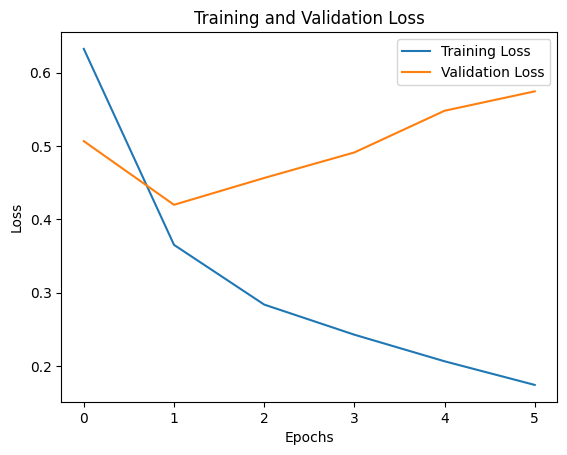

In [ ]:
import matplotlib.pyplot as plt

# Extract the loss values
train_loss = history.history['loss']        # Training loss
val_loss = history.history['val_loss']      # Validation loss

# Plot both losses
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Get predictions on the test set
y_pred_prob = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred = y_pred_prob.argmax(axis=1)  # Since you're using softmax, we take the argmax to get class labels

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


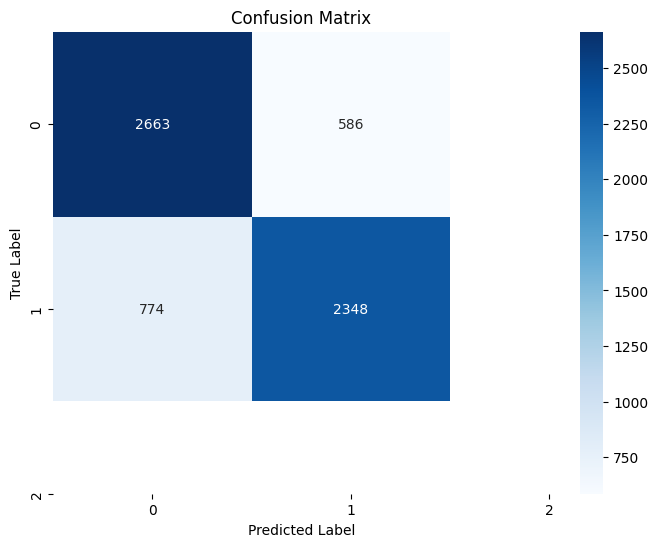

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.preprocessing import label_binarize

# One-hot encode the true labels
y_test_onehot = label_binarize(y_test, classes=[0, 1, 2])  # Adjust based on your number of classes


In [ ]:
# Get predicted probabilities for the test set
y_pred_prob = model.predict(X_test)  # This returns the softmax probabilities for each class


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


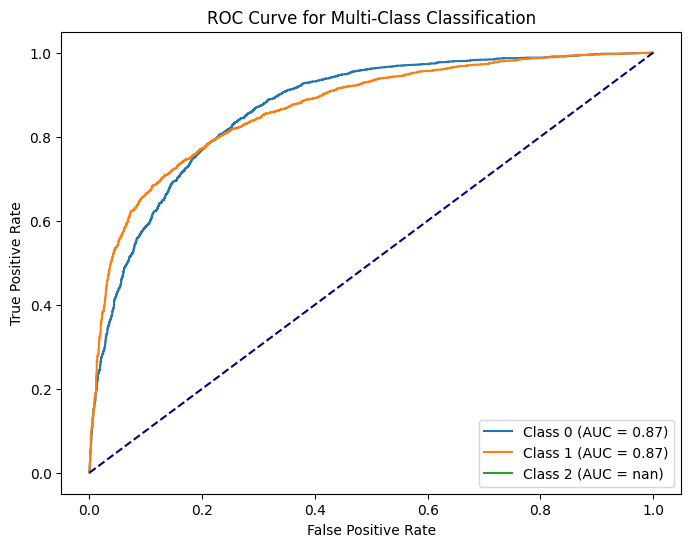

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Dictionary to hold the ROC metrics for each class
fpr = {}
tpr = {}
roc_auc = {}

# Compute the ROC curve for each class
for i in range(3):  # Assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()


In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=40706d5846ae07974cb082c935295a303038a2bc5391699c2386dcaf1739d3bd
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Example setup - be sure to use the same vocabulary size as during training
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")

# Assuming X_train is a NumPy array containing numerical data or preprocessed text
# Convert X_train to a list of strings
X_train_texts = [str(text) for text in X_train]  # Convert each item to a string if necessary

# Now fit on the string data
tokenizer.fit_on_texts(X_train_texts)  # Fit on training data

In [ ]:
import numpy as np
import lime
from lime.lime_text import LimeTextExplainer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example sentence and label
sentence_index = 0  # Index of the sentence in X_test
sentence = X_test[sentence_index]  # Example test sentence
true_label = y_test[sentence_index]  # Actual label

# Assuming you have a tokenizer and it has a method to convert ids to text
# If not, you'll need to implement this based on how your tokenizer works
sentence_text = tokenizer.sequences_to_texts([sentence])[0]

# Define the prediction function for LIME
def predict_proba(texts):
    # Tokenize and pad the texts
    sequences = tokenizer.texts_to_sequences(texts)  # Assuming you have a tokenizer
    padded_sequences = pad_sequences(sequences, maxlen=sentence_length, padding='post')

    # Get model predictions
    probs = model.predict(padded_sequences)
    return probs

# Initialize LIME for text
explainer = LimeTextExplainer(class_names=['NOt Hate Speech', 'Hate Speech'])

# Choose a sample text to explain
sample_text = (input())

# Generate explanation
# Pass sentence_text instead of sentence (the numpy array)
exp = explainer.explain_instance(sample_text, predict_proba, num_features=3)

# Visualize the explanation
exp.show_in_notebook(text=sample_text)

My name is nayim. i want to kill all people who are muslim
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
